# Problem’s overview
With the expanded applications of modern-day networking, network infrastructures are at risk from cyber-attacks and intrusions. Multiple datasets have been proposed in the literature that can be used to create Machine Learning (ML) based Network Intrusion Detection Systems (NIDS). However, many of these datasets suffer from sub-optimal performance and do not adequately and effectively represent all types of intrusions.  Another problem with these datasets is the low accuracy of tail classes. To address these issues,  we propose the University of Nevada - Reno Intrusion Detection Dataset (UNR-IDD) that provides researchers with a wider range of samples and scenarios.
![image](https://drive.google.com/uc?export=view&id=12F5nT5UPD-PQWMy23u6iVmP36EEF2gqC)
<br>
**Note: This is a real world problem you can check link from more information and how the University of Nevada, Reno collect the data**
https://www.tapadhirdas.com/unr-idd-dataset

# Multi-class Classification
The goal of multi-class classification is to differentiate the intrusions not only from normal working conditions but also from each other. Multi-class classification helps us to learn about the root causes of network intrusions. The labels for multi-class classification in UNR-IDD are illustrated in the accompanying table.

| Label	      | Description                   |
| ----------- | -----------                   |
|Normal       |	Normal| Network Functionality.|
|TCP-SYN      |	TCP-SYN Flood.                |
|PortScan     |	Port Scanning.                |
|Overflow     |	Flow Table Overflow.          |
|Blackhole    |	Blackhole Attack.             |
|Diversion    |	Traffic Diversion Attack.     |

# The Project Methodology
![image](https://drive.google.com/uc?export=view&id=1mMgQzvgfCqGYUnkptkJ_Ahh3fRBPgMde)

# Download dataset

In [ ]:
!pip install gdown

In [ ]:
!gdown --id 1pXPFDKFRANYq4R6JS9t-j-JcUR6Nfq5w
!gdown --id 1fN_rJgZIuE4-RVMychy2QwQvkWY1dwGj
!gdown --id 1rwqkQjqRl8qXCgCnCYOk8BC4daB4PLch

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pXPFDKFRANYq4R6JS9t-j-JcUR6Nfq5w
To: /content/train.csv
100% 289k/289k [00:00<00:00, 78.2MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1fN_rJgZIuE4-RVMychy2QwQvkWY1dwGj
To: /content/val.csv
100% 61.9k/61.9k [00:00<00:00, 89.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rwq

In [ ]:
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
seed = 0
tf.random.set_seed(seed)
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')
test  = pd.read_csv('test.csv')

# EDA

## Data Discovery

In [ ]:
train

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched,Label
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,1,0,0,0,0,0,4,819,757,TCP-SYN
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,2,0,0,0,0,0,5,1018,918,TCP-SYN
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,2,0,0,0,0,0,8,987400,987276,Normal
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,3,0,0,0,0,0,8,195879,195780,PortScan
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,1,0,0,0,0,0,4,4524,4411,Overflow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,of:0000000000000008,Port#:1,646,18927937,26139,253,151,2,278,278,...,4,0,0,0,0,0,6,1563,1469,PortScan
2615,of:000000000000000b,Port#:2,3149,25488846,31784484,3205,2326,4,556,556,...,3,0,0,0,0,0,4,14774,14647,Blackhole
2616,of:000000000000000c,Port#:3,386,6324623,13285,97,101,27,526635,556,...,2,0,0,0,0,0,8,2688,2590,TCP-SYN
2617,of:000000000000000c,Port#:2,807,12638724,25268608,1238,366,47,3379,3939658,...,2,630355,6303550,630355,6303550,630355,6,3088,2976,Blackhole


## Split the data as features and target

In [ ]:
X_train=train.drop('Label',axis=1)
y_train=train['Label']
X_test=test.drop('Label',axis=1)
y_test=test['Label']
X_val=val.drop('Label',axis=1)
y_val=val['Label']
X_train

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,...,Delta Port alive Duration (S),Connection Point,Total Load/Rate,Total Load/Latest,Unknown Load/Rate,Unknown Load/Latest,Latest bytes counter,Active Flow Entries,Packets Looked Up,Packets Matched
0,of:0000000000000004,Port#:1,240,16586,12622603,467,126,0,0,280,...,5,1,0,0,0,0,0,4,819,757
1,of:0000000000000004,Port#:2,158,20530,35464,376,171,4,556,3407,...,5,2,0,0,0,0,0,5,1018,918
2,of:0000000000000008,Port#:3,1930,37881404,67857371,414333,1297,0,0,556,...,5,2,0,0,0,0,0,8,987400,987276
3,of:0000000000000001,Port#:4,903,18946410,17900326,98088,176,3,320,270280,...,4,3,0,0,0,0,0,8,195879,195780
4,of:000000000000000b,Port#:1,423,29020,19138042,1562,1451,0,0,560,...,5,1,0,0,0,0,0,4,4524,4411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,of:0000000000000008,Port#:1,646,18927937,26139,253,151,2,278,278,...,5,4,0,0,0,0,0,6,1563,1469
2615,of:000000000000000b,Port#:2,3149,25488846,31784484,3205,2326,4,556,556,...,5,3,0,0,0,0,0,4,14774,14647
2616,of:000000000000000c,Port#:3,386,6324623,13285,97,101,27,526635,556,...,4,2,0,0,0,0,0,8,2688,2590
2617,of:000000000000000c,Port#:2,807,12638724,25268608,1238,366,47,3379,3939658,...,5,2,630355,6303550,630355,6303550,630355,6,3088,2976


### Convert categorical data into numerical by one hot encoding

In [ ]:
X_train_numeric = pd.get_dummies(X_train, drop_first=True)
X_val_numeric = pd.get_dummies(X_val, drop_first=True)
X_test_numeric = pd.get_dummies(X_test, drop_first=True)
X_train_numeric

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
0,240,16586,12622603,467,126,0,0,280,2,5,...,0,0,0,0,0,0,0,0,0,0
1,158,20530,35464,376,171,4,556,3407,43,5,...,0,0,0,0,0,0,0,1,0,0
2,1930,37881404,67857371,414333,1297,0,0,556,4,5,...,0,0,1,0,0,0,0,0,1,0
3,903,18946410,17900326,98088,176,3,320,270280,5002,4,...,0,0,0,0,0,0,0,0,0,1
4,423,29020,19138042,1562,1451,0,0,560,4,5,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,646,18927937,26139,253,151,2,278,278,2,5,...,0,0,1,0,0,0,0,0,0,0
2615,3149,25488846,31784484,3205,2326,4,556,556,4,5,...,0,0,0,0,0,1,0,1,0,0
2616,386,6324623,13285,97,101,27,526635,556,4,4,...,0,0,0,0,0,0,1,0,1,0
2617,807,12638724,25268608,1238,366,47,3379,3939658,105,5,...,0,0,0,0,0,0,1,1,0,0


## Number of instances per class

In [ ]:
y_train.value_counts()

PortScan     666
TCP-SYN      651
Blackhole    561
Diversion    414
Normal       254
Overflow      73
Name: Label, dtype: int64

### Number of null values per feature

In [ ]:
X_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Received Packets               2619 non-null   int64
 1   Received Bytes                 2619 non-null   int64
 2   Sent Bytes                     2619 non-null   int64
 3   Sent Packets                   2619 non-null   int64
 4   Port alive Duration (S)        2619 non-null   int64
 5   Delta Received Packets         2619 non-null   int64
 6   Delta Received Bytes           2619 non-null   int64
 7   Delta Sent Bytes               2619 non-null   int64
 8   Delta Sent Packets             2619 non-null   int64
 9   Delta Port alive Duration (S)  2619 non-null   int64
 10  Connection Point               2619 non-null   int64
 11  Total Load/Rate                2619 non-null   int64
 12  Total Load/Latest              2619 non-null   int64
 13  Unknown Load/Rate 

### There is no null values per features

# Checking the outliers via boxplot

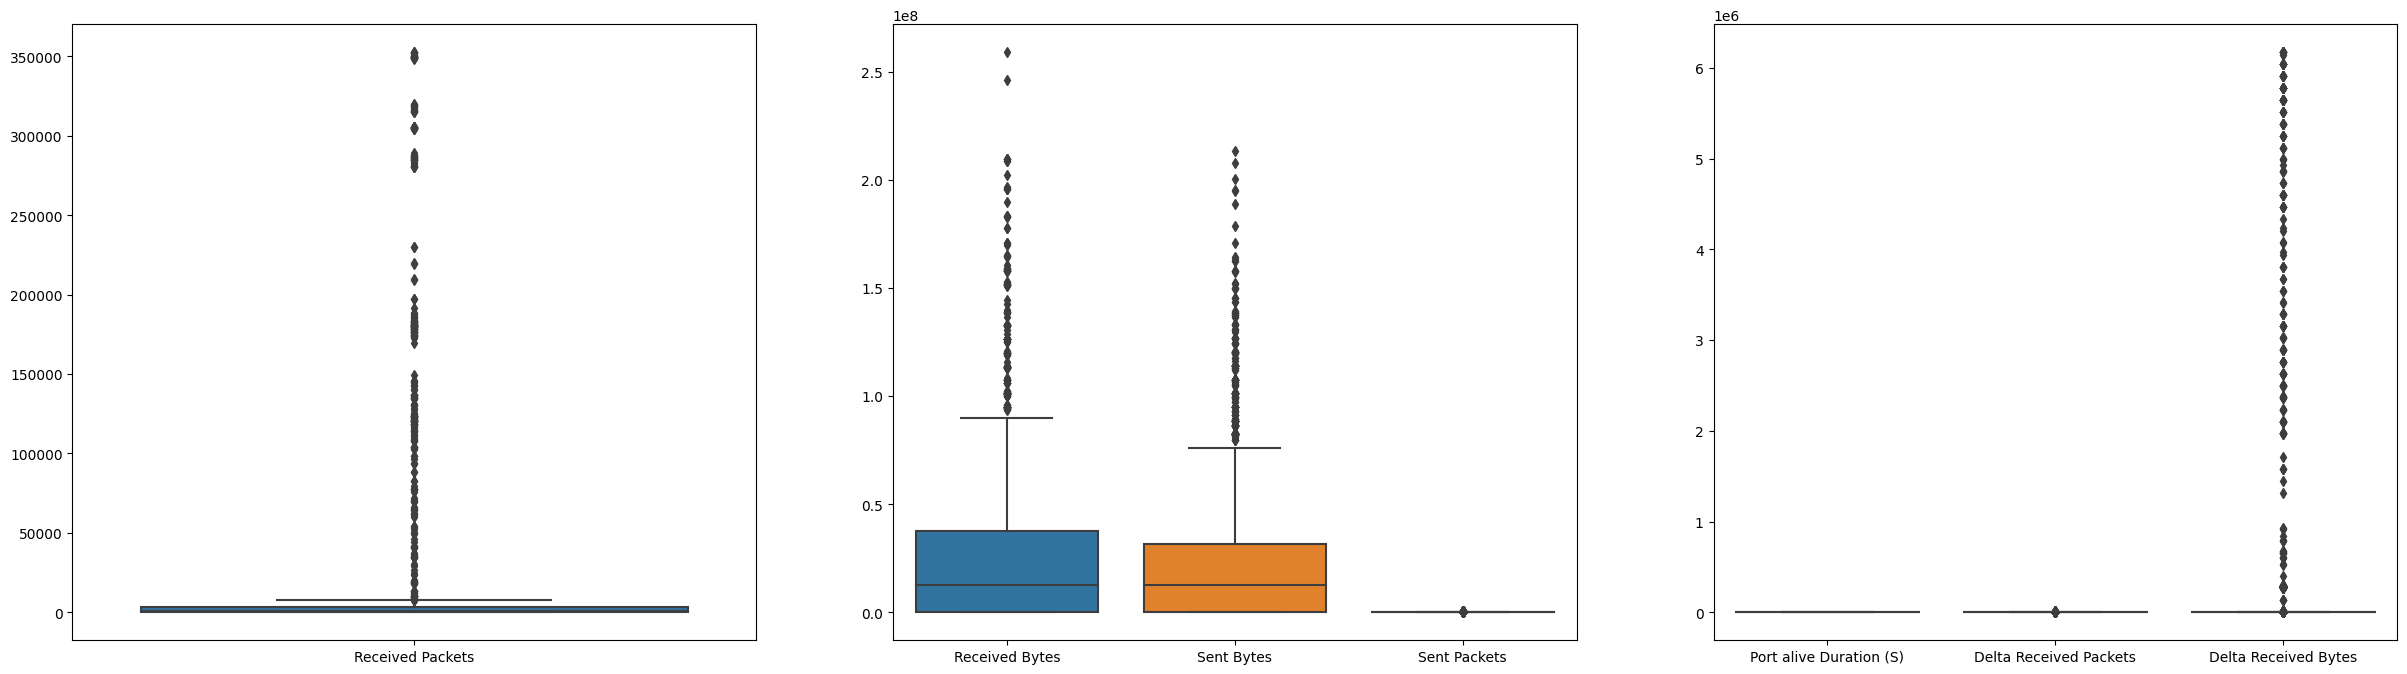

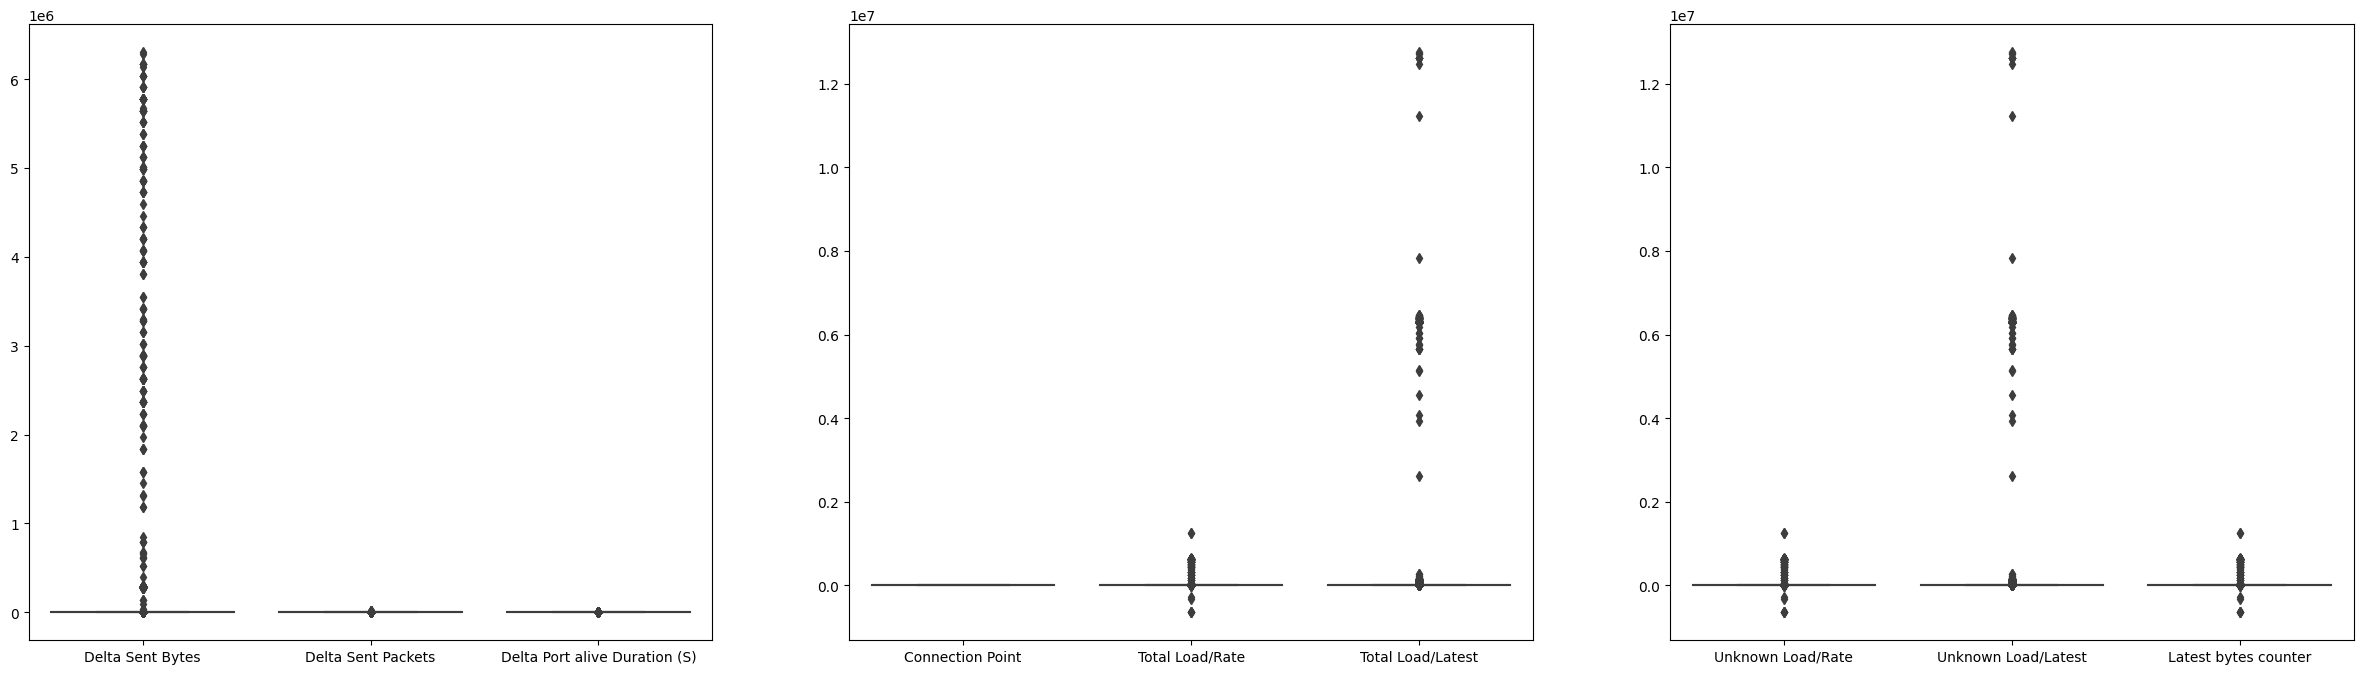

In [ ]:
for i in range(0,18,9) :
    fig,axis =plt.subplots(1,3,figsize=(30,8))
    sns.boxplot(data=X_train.iloc[:,i:i+3],ax=axis[0])
    sns.boxplot(data=X_train.iloc[:,i+3:i+6],ax=axis[1])
    sns.boxplot(data=X_train.iloc[:,i+6:i+9],ax=axis[2])
    plt.show()


## Count the outliers

In [ ]:

for i,col in enumerate(X_train_numeric.columns):
    if i > 18 :
        break
    q_low = X_train[col].quantile(0.25)
    q_hi  = X_train[col].quantile(0.75)
    IQR = (q_hi-q_low)
    df_filtered = X_train[(X_train[col] > (q_hi + 1.5 * IQR)) | (X_train[col] < (q_low - 1.5 * IQR))]
    print(f'Feature name {col} --> number of outliers is {len(df_filtered)}')

Feature name Received Packets --> number of outliers is 312
Feature name Received Bytes --> number of outliers is 186
Feature name Sent Bytes --> number of outliers is 222
Feature name Sent Packets --> number of outliers is 379
Feature name Port alive Duration (S) --> number of outliers is 0
Feature name Delta Received Packets --> number of outliers is 649
Feature name Delta Received Bytes --> number of outliers is 648
Feature name Delta Sent Bytes --> number of outliers is 604
Feature name Delta Sent Packets --> number of outliers is 604
Feature name Delta Port alive Duration (S) --> number of outliers is 441
Feature name Connection Point --> number of outliers is 0
Feature name Total Load/Rate --> number of outliers is 396
Feature name Total Load/Latest --> number of outliers is 501
Feature name Unknown Load/Rate --> number of outliers is 396
Feature name Unknown Load/Latest --> number of outliers is 501
Feature name Latest bytes counter --> number of outliers is 396
Feature name Act

### The statistical analysis for every feature (mean, std, min, max)

In [ ]:
X_train_numeric.describe()

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
count,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,2619.000000,2.619000e+03,2.619000e+03,2619.000000,2619.000000,...,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000
mean,19929.095074,2.606639e+07,2.372645e+07,33676.567774,890.539137,174.948835,3.254661e+05,2.957171e+05,160.607866,4.831615,...,0.046201,0.072165,0.057274,0.050019,0.128293,0.058037,0.138221,0.326079,0.246277,0.121039
std,61817.860816,3.670801e+07,3.309908e+07,90565.150583,970.916789,1028.907797,1.166624e+06,1.107859e+06,972.484039,0.374279,...,0.209960,0.258810,0.232409,0.218026,0.334480,0.233859,0.345197,0.468866,0.430924,0.326234
min,10.000000,8.560000e+02,6.025000e+03,44.000000,26.000000,0.000000,0.000000e+00,2.780000e+02,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,321.500000,8.464900e+04,5.360900e+04,333.500000,136.000000,2.000000,2.780000e+02,2.800000e+02,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1108.000000,1.262083e+07,1.262176e+07,1243.000000,254.000000,4.000000,5.560000e+02,5.560000e+02,4.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3268.500000,3.736785e+07,3.170219e+07,3727.000000,1721.000000,6.000000,8.310000e+02,7.590000e+02,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,352584.000000,2.589422e+08,2.130728e+08,420806.000000,3317.000000,15588.000000,6.171714e+06,6.302910e+06,15593.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Prepare the data for neural network model

### Data Scaling for making the all the features in the same range

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns = X_train_numeric.columns)
X_val_scaled= pd.DataFrame(scaler.transform(X_val_numeric), columns = X_val_numeric.columns)
X_test_scaled= pd.DataFrame(scaler.transform(X_test_numeric), columns = X_test_numeric.columns)
X_train_scaled

,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Delta Received Packets,Delta Received Bytes,Delta Sent Bytes,Delta Sent Packets,Delta Port alive Duration (S),...,Switch ID_of:0000000000000006,Switch ID_of:0000000000000007,Switch ID_of:0000000000000008,Switch ID_of:0000000000000009,Switch ID_of:000000000000000a,Switch ID_of:000000000000000b,Switch ID_of:000000000000000c,Port Number_Port#:2,Port Number_Port#:3,Port Number_Port#:4
0,-0.318563,-0.709785,-0.335537,-0.366763,-0.787591,-0.170066,-0.279034,-0.266725,-0.163127,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,-0.571619,-0.371088
1,-0.319889,-0.709677,-0.715896,-0.367768,-0.741234,-0.166178,-0.278558,-0.263902,-0.120959,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,-0.400487,1.437618,-0.571619,-0.371088
2,-0.291219,0.321926,1.333552,4.203925,0.418716,-0.170066,-0.279034,-0.266476,-0.161070,0.449977,...,-0.220088,-0.278887,4.057093,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,1.749419,-0.371088
3,-0.307835,-0.194000,-0.176054,0.711352,-0.736083,-0.167150,-0.278760,-0.022965,4.979328,-2.222336,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,-0.571619,2.694778
4,-0.315602,-0.709446,-0.138653,-0.354670,0.577359,-0.170066,-0.279034,-0.266472,-0.161070,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,4.02868,-0.400487,-0.695595,-0.571619,-0.371088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,-0.311994,-0.194503,-0.716178,-0.369126,-0.761837,-0.168122,-0.278796,-0.266727,-0.163127,0.449977,...,-0.220088,-0.278887,4.057093,-0.229462,-0.383634,-0.24822,-0.400487,-0.695595,-0.571619,-0.371088
2615,-0.271496,-0.015737,0.243498,-0.336524,1.478742,-0.166178,-0.278558,-0.266476,-0.161070,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,4.02868,-0.400487,1.437618,-0.571619,-0.371088
2616,-0.316200,-0.537908,-0.716567,-0.370849,-0.813345,-0.143820,0.172470,-0.266476,-0.161070,-2.222336,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,2.496959,-0.695595,1.749419,-0.371088
2617,-0.309389,-0.365867,0.046601,-0.358248,-0.540355,-0.124378,-0.276137,3.289801,-0.057192,0.449977,...,-0.220088,-0.278887,-0.246482,-0.229462,-0.383634,-0.24822,2.496959,1.437618,-0.571619,-0.371088


In [ ]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Received Packets               2619 non-null   float64
 1   Received Bytes                 2619 non-null   float64
 2   Sent Bytes                     2619 non-null   float64
 3   Sent Packets                   2619 non-null   float64
 4   Port alive Duration (S)        2619 non-null   float64
 5   Delta Received Packets         2619 non-null   float64
 6   Delta Received Bytes           2619 non-null   float64
 7   Delta Sent Bytes               2619 non-null   float64
 8   Delta Sent Packets             2619 non-null   float64
 9   Delta Port alive Duration (S)  2619 non-null   float64
 10  Connection Point               2619 non-null   float64
 11  Total Load/Rate                2619 non-null   float64
 12  Total Load/Latest              2619 non-null   f

### Convert to tensors

In [ ]:
X_train_scaled_tensor=tf.convert_to_tensor(X_train_scaled, dtype=np.float64)
X_val_scaled_tensor=tf.convert_to_tensor(X_val_scaled,dtype=np.float64)
X_test_scaled_tensor=tf.convert_to_tensor(X_test_scaled,dtype=np.float64)
X_train_scaled_tensor

<tf.Tensor: shape=(2619, 33), dtype=float64, numpy=
array([[-0.31856254, -0.70978461, -0.33553717, ..., -0.69559521,
        -0.57161851, -0.37108805],
       [-0.31988928, -0.70967715, -0.71589647, ...,  1.43761773,
        -0.57161851, -0.37108805],
       [-0.29121895,  0.32192611,  1.333552  , ..., -0.69559521,
         1.74941851, -0.37108805],
       ...,
       [-0.31620032, -0.53790819, -0.71656668, ..., -0.69559521,
         1.74941851, -0.37108805],
       [-0.30938869, -0.36586654,  0.04660094, ...,  1.43761773,
        -0.57161851, -0.37108805],
       [-0.31362775, -0.53753359, -0.33542854, ...,  1.43761773,
        -0.57161851, -0.37108805]])>

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)
y_train_encoded

array([5, 5, 2, ..., 5, 0, 5])

# Build MLP General Model

## Helper Functions

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from tensorflow_addons.optimizers import AdamW
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


### Plot History

In [ ]:
def plot_history(dict_of_lists,type='loss'):
  axis_idx=[(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
  fig, axes = plt.subplots(2, 3,figsize=(20,10))

  for i in range(len(dict_of_lists)):
    ax=axes[axis_idx[i][0]][axis_idx[i][1]]
    # summarize history for accuracy
    ax.plot(dict_of_lists[i].history[type])
    ax.plot(dict_of_lists[i].history[f'val_{type}'])
    ax.set_title(f'Model {i+1} {type.title()}',size=15)
    ax.set_ylabel(f'{type.title()}',size=10)
    ax.set_xlabel('Epoch',size=10)
    ax.legend(['train', 'test'], loc='upper left')
  plt.suptitle(f'Models {type.title()} per Epoc',size=15,y=.93)
  plt.show()

### Build Model

In [ ]:
def Build_model(X_train,y_train,X_val,y_val,X_test,y_test,optimizer,
                n_of_hidden_layers,n_neurons,activation='relu',epochs=500,batch_size=1024,early_stopping=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.Input(shape=(X_train.shape[1],)))
    for _ in range(n_of_hidden_layers):
      model.add(keras.layers.Dense(n_neurons, activation=activation))
    model.add(keras.layers.Dense(6, activation='softmax'))

    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    es=tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        mode="auto",
        baseline=None,
        restore_best_weights=True,)
    # Fit model
    if early_stopping :
        history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=epochs,batch_size=batch_size,callbacks=[es],verbose=0)
    else:
        history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs,batch_size=batch_size,verbose=0)
    # Evaluate the model
    train_evaluation = model.evaluate(X_train, y_train)
    test_evaluation = model.evaluate(X_test, y_test)
    validation_evaluation = model.evaluate(X_val, y_val)
    return model, history, train_evaluation, validation_evaluation ,test_evaluation

### Build Experment

In [ ]:
def Build_experment(X_train,y_train,X_val,y_val,X_test,y_test,optimizer,
                    n_of_hidden_layers,n_neurons,activation='relu',epochs=500,batch_size=1024,n_of_models=5,early_stopping=True):
    models_dict = {'models':[], 'history': []}

    models_train_acc = []
    models_test_acc = []
    models_valid_acc = []
    for j in range(n_of_models):
        # Build model
        model, history, train_evaluation,valid_evaluation, test_evaluation = Build_model(X_train,y_train,X_val,y_val,X_test,y_test,optimizer,
                n_of_hidden_layers,n_neurons,activation=activation,epochs=epochs,batch_size=batch_size,early_stopping=early_stopping)
        # Save data
        models_train_acc.append(train_evaluation[1])
        models_test_acc.append(test_evaluation[1])
        models_valid_acc.append(valid_evaluation[1])

        models_dict['models'].append(model)
        models_dict['history'].append(history)


    accuracies_dict={}
    accuracies_dict["Min_train_acc"]=min(models_train_acc)
    accuracies_dict["Max_train_acc"]=max(models_train_acc)
    accuracies_dict["AVG_train_acc"]=mean(models_train_acc)

    accuracies_dict["Min_test_acc"]=min(models_test_acc)
    accuracies_dict["Max_test_acc"]=max(models_test_acc)
    accuracies_dict["AVG_test_acc"]=mean(models_test_acc)

    accuracies_dict["Min_valid_acc"]=min(models_valid_acc)
    accuracies_dict["Max_valid_acc"]=max(models_valid_acc)
    accuracies_dict["AVG_valid_acc"]=mean(models_valid_acc)

    return accuracies_dict, models_dict,models_train_acc,models_test_acc,models_valid_acc

## Obtain the baseline performance

### Train the baseline model

In [ ]:
optimizer=AdamW(learning_rate=0.001, weight_decay=.00001)
base_line_accuracies_dict, base_line_models_dict,base_line_models_train_acc,base_line_models_test_acc,base_line_models_valid_acc = Build_experment(X_train_scaled_tensor, y_train_encoded, X_val_scaled_tensor, y_val_encoded, X_test_scaled_tensor, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=1024, n_of_models=5,early_stopping=False)

18/18 [==============================] - 0s 2ms/step - loss: 0.6077 - accuracy: 0.7611


## Plot the training and testing losses vs. the number of epochs

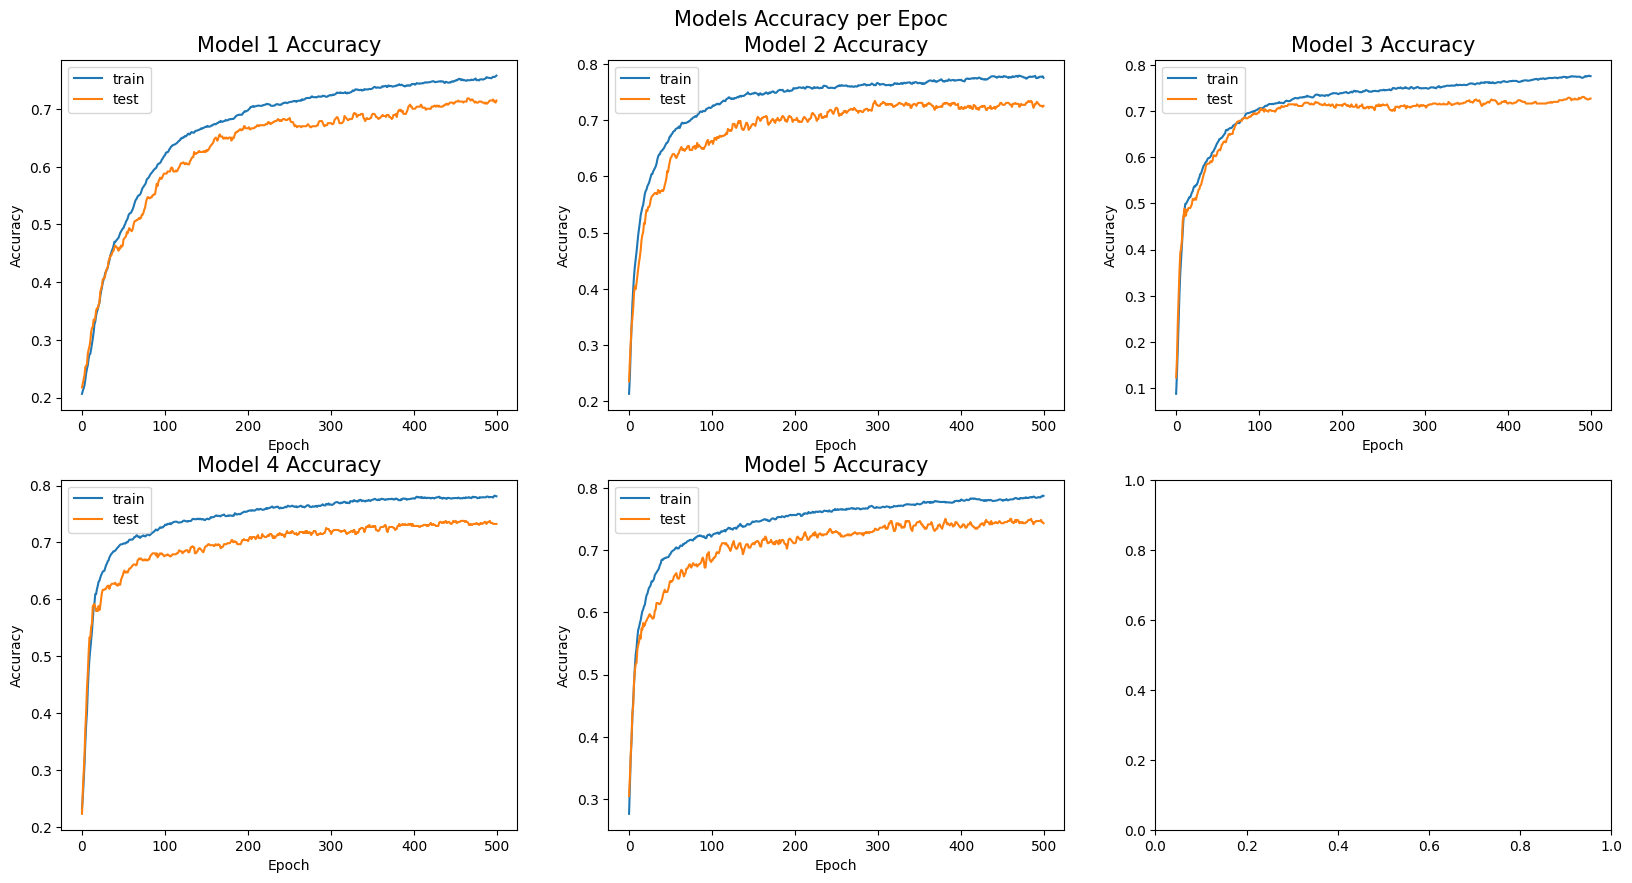

In [ ]:
plot_history(base_line_models_dict['history'],type='accuracy')

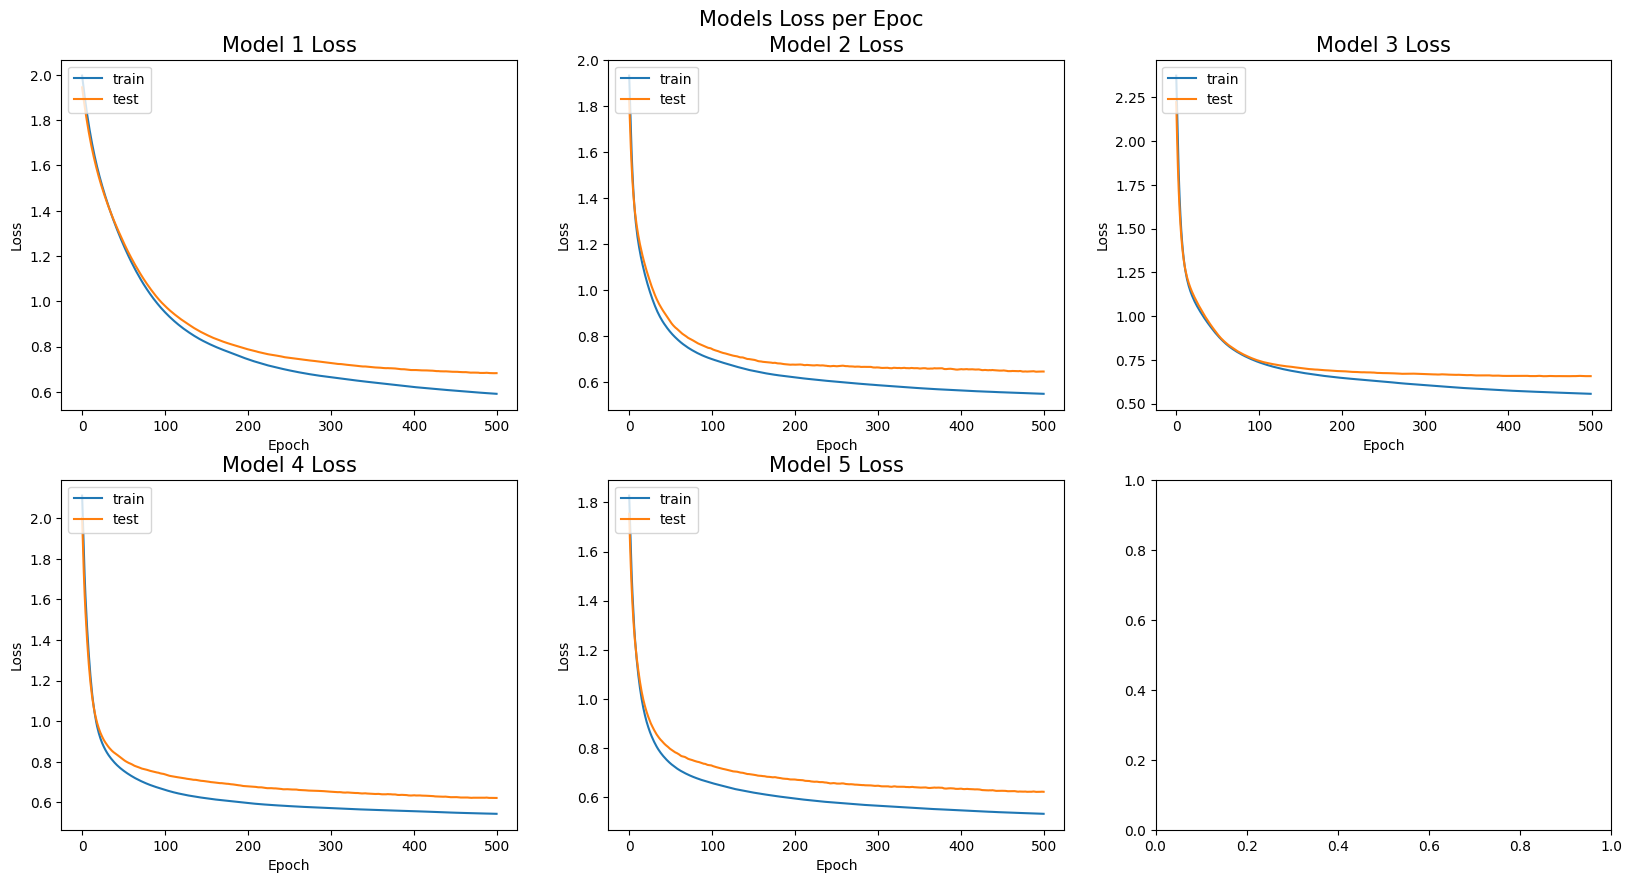

In [ ]:
plot_history(base_line_models_dict['history'],type='loss')

## Table of Accuracies

In [ ]:
# base_line_highest_acc = base_line_models_dict['models'][np.array(base_line_models_test_acc).argmax()]
pd.DataFrame(pd.Series(base_line_accuracies_dict)).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.756777,0.786942,0.775945,0.714795,0.743316,0.728699,0.736185,0.761141,0.752228


## The confusion matrix based on the average test accuracy

In [ ]:
# Calculate the Average confusion test matrix
cm = np.zeros(shape=(6,6))
for model in base_line_models_dict['models']:
    pred = model.predict(X_test_scaled).argmax(axis=1)
    cm += confusion_matrix(y_test_encoded, pred)
cm_avg = cm/ len(base_line_models_dict['models'])

18/18 [==============================] - 0s 2ms/step


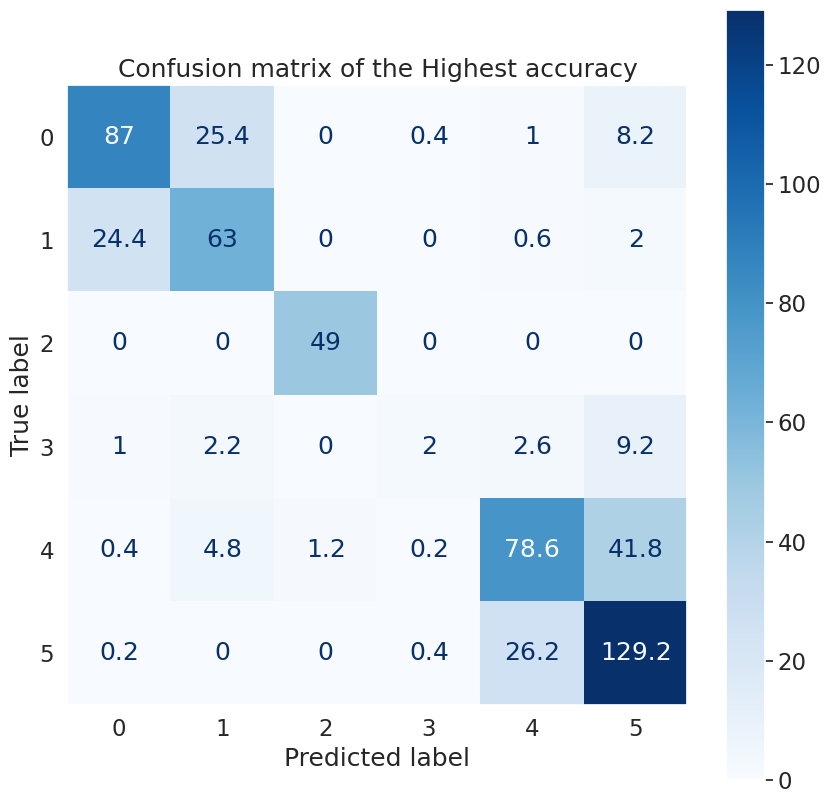

In [ ]:
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale = 1.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg,)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g',)

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()

## THE 2D TSNE plots

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(15,15)})
sns.set_context("notebook", font_scale=2)
def TSNE_visualizer(data_set):
  tsne = TSNE(n_components=2, random_state=0,init='pca',learning_rate='auto')
  z = tsne.fit_transform(data_set)
  return z

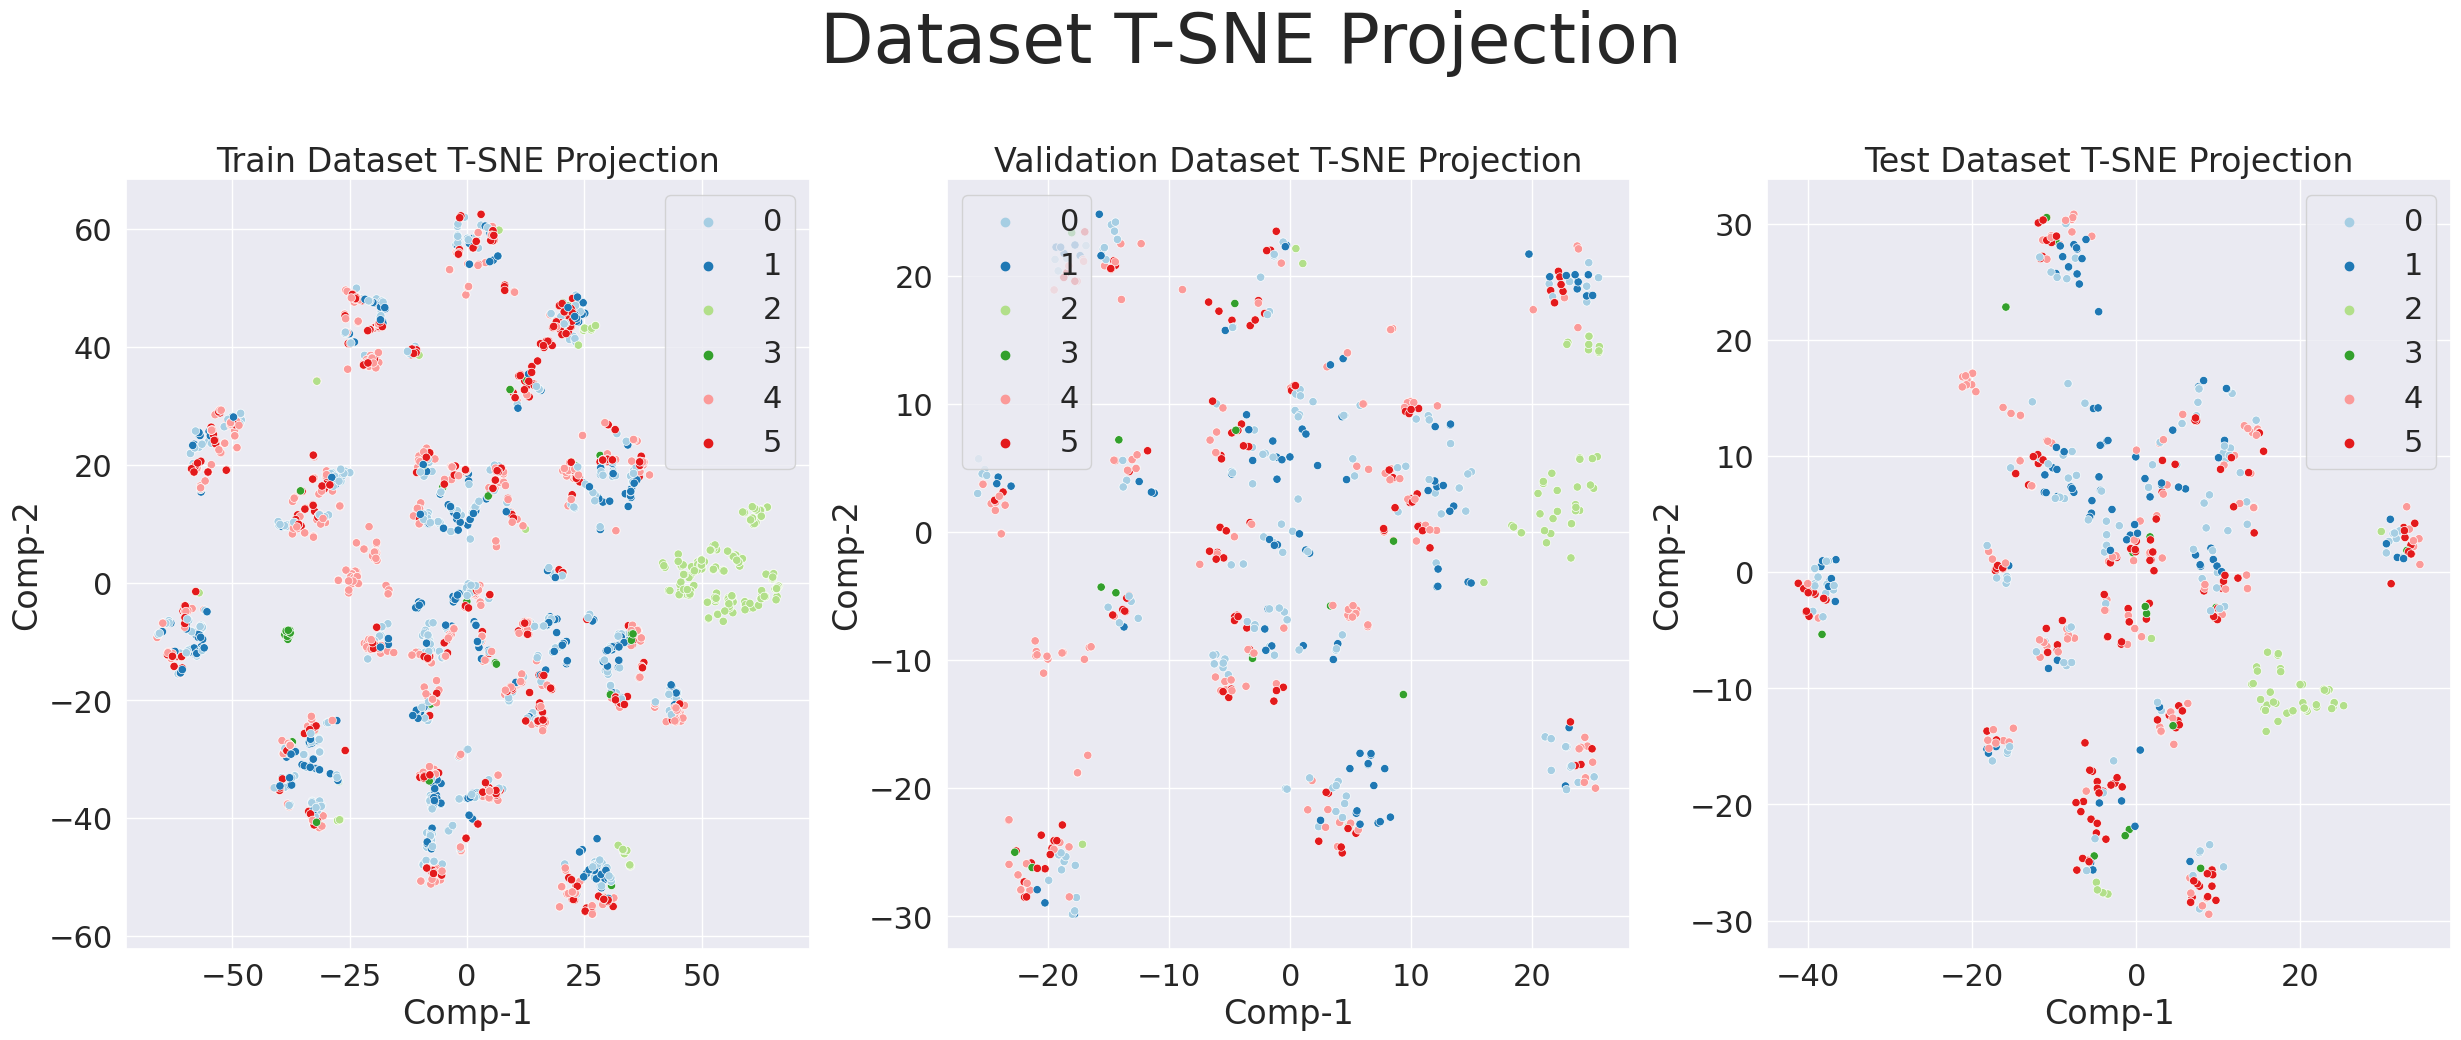

In [ ]:
# TSNE_visualizer(np.array(encoded_train, dtype='float'), y_train_ord, 'Training')
t_sne_plots = [TSNE_visualizer(np.array(X_train_scaled, dtype='float')),
               TSNE_visualizer(np.array(X_val_scaled, dtype='float')),
               TSNE_visualizer(np.array(X_test_scaled, dtype='float'))]

x_size , y_size =1,3
fig, axes = plt.subplots(1, 3,figsize=(30,10))

titles =["Train","Validation", "Test"]
c = [y_train_encoded, y_val_encoded, y_test_encoded]
for i in range(3):
  ax = axes[i]
  sns.scatterplot(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1],hue=c[i],ax=ax,palette="Paired")
  # ax.scatter(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1], c= c[i])
  ax.set_title(f"{titles[i]} Dataset T-SNE Projection")
  ax.set_xlabel('Comp-1')
  ax.set_ylabel('Comp-2')

plt.suptitle('Dataset T-SNE Projection',size=50,y=1.05)
plt.savefig("Dataset T-SNE Projection.png")
plt.show()

# Compring the dimensionality reduction to the feature selection

## Apply PCA as a dimensionality reduction

### a) Find the best value of n components, based on test accuracies

In [ ]:
from sklearn.decomposition import PCA

n_comp = range(2,34)
PCA_test_accuracies =[]
PCA_val_accuracies=[]
for i in n_comp:
    pca = PCA(n_components=i,random_state=0)
    pca_train = tf.convert_to_tensor(pca.fit_transform(X_train_scaled))
    pca_val = tf.convert_to_tensor(pca.transform(X_val_scaled))
    pca_test = tf.convert_to_tensor(pca.transform(X_test_scaled))
    pca_accuracies_dict, pca_models_dict,pca_models_train_acc,pca_models_test_acc,pca_models_valid_acc = Build_experment(pca_train, y_train_encoded, pca_val, y_val_encoded, pca_test, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=512, n_of_models=5)

    PCA_test_accuracies.append(pca_accuracies_dict['AVG_test_acc'])
    PCA_val_accuracies.append(pca_accuracies_dict['AVG_valid_acc'])


18/18 [==============================] - 0s 2ms/step - loss: 0.6138 - accuracy: 0.7522


#### **NN Accuracy VS PCA component**

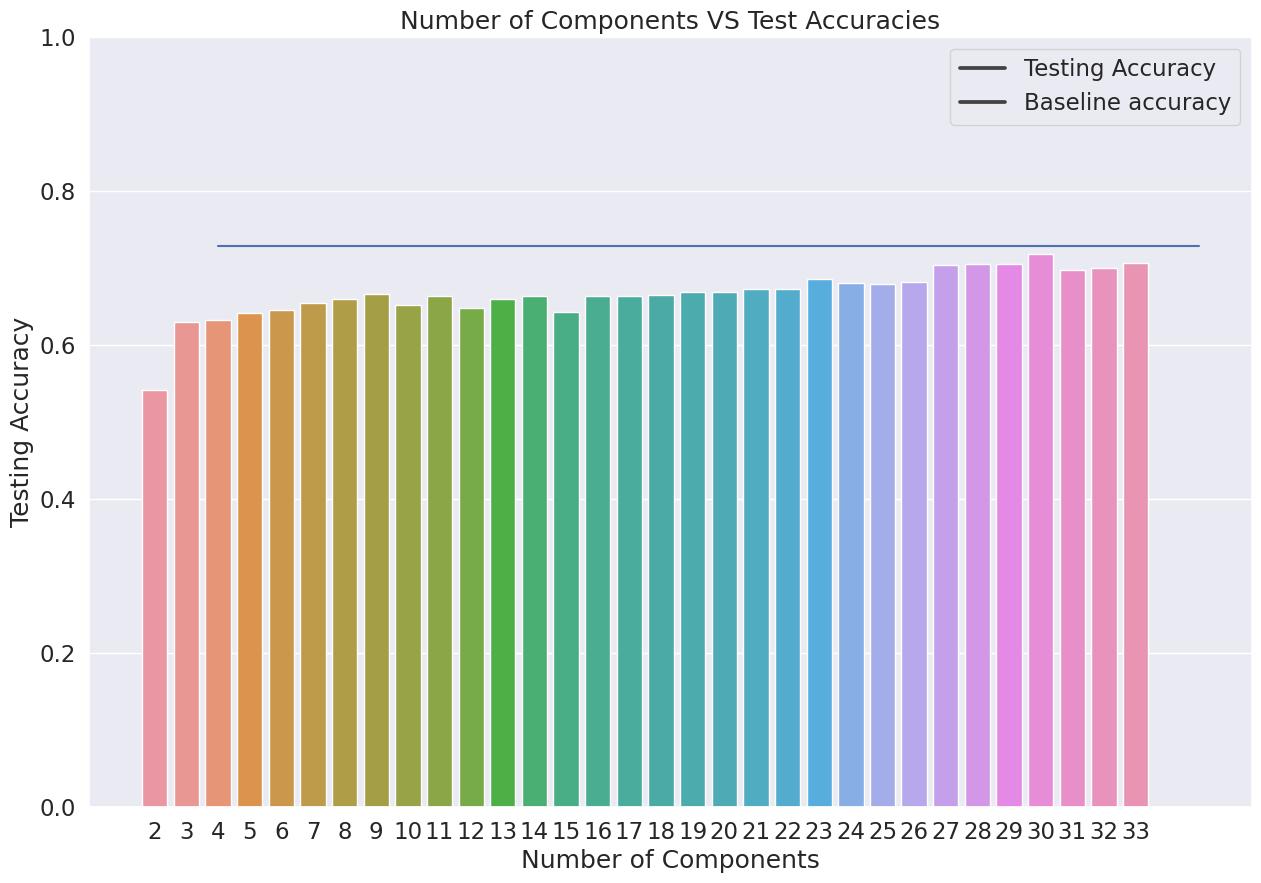

In [ ]:
import seaborn as sns
sns.set_context("talk")
sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.5)

sns.barplot(x=list(n_comp) , y = PCA_test_accuracies)
sns.lineplot(x= list(n_comp), y = [base_line_accuracies_dict["AVG_test_acc"]]*len(PCA_test_accuracies),sizes=[10]).set(title='Number of Components VS Test Accuracies')
plt.xlabel('Number of Components')
plt.ylabel('Testing Accuracy')
plt.legend(['Testing Accuracy','Baseline accuracy'])
plt.ylim(0,1)
plt.show()

#### 2D TSNE plots, one for the training set and one for the test set

In [ ]:
n_comp=list(n_comp)
best_n_com=n_comp[np.array(PCA_test_accuracies).argmax()]
best_n_com,max(PCA_test_accuracies)

(30, 0.7183600664138794)

## Train with the best number of componant

In [ ]:
pca = PCA(n_components=best_n_com)
pca_train = pca.fit_transform(X_train_scaled)
pca_val = pca.transform(X_val_scaled)
pca_test = pca.transform(X_test_scaled)

#### PLot the T-SNE for the Data after the Dimensionality reduction

In [ ]:
t_sne_plots = [TSNE_visualizer(np.array(pca_train, dtype='float')),
               TSNE_visualizer(np.array(pca_val, dtype='float')),
               TSNE_visualizer(np.array(pca_test, dtype='float'))]

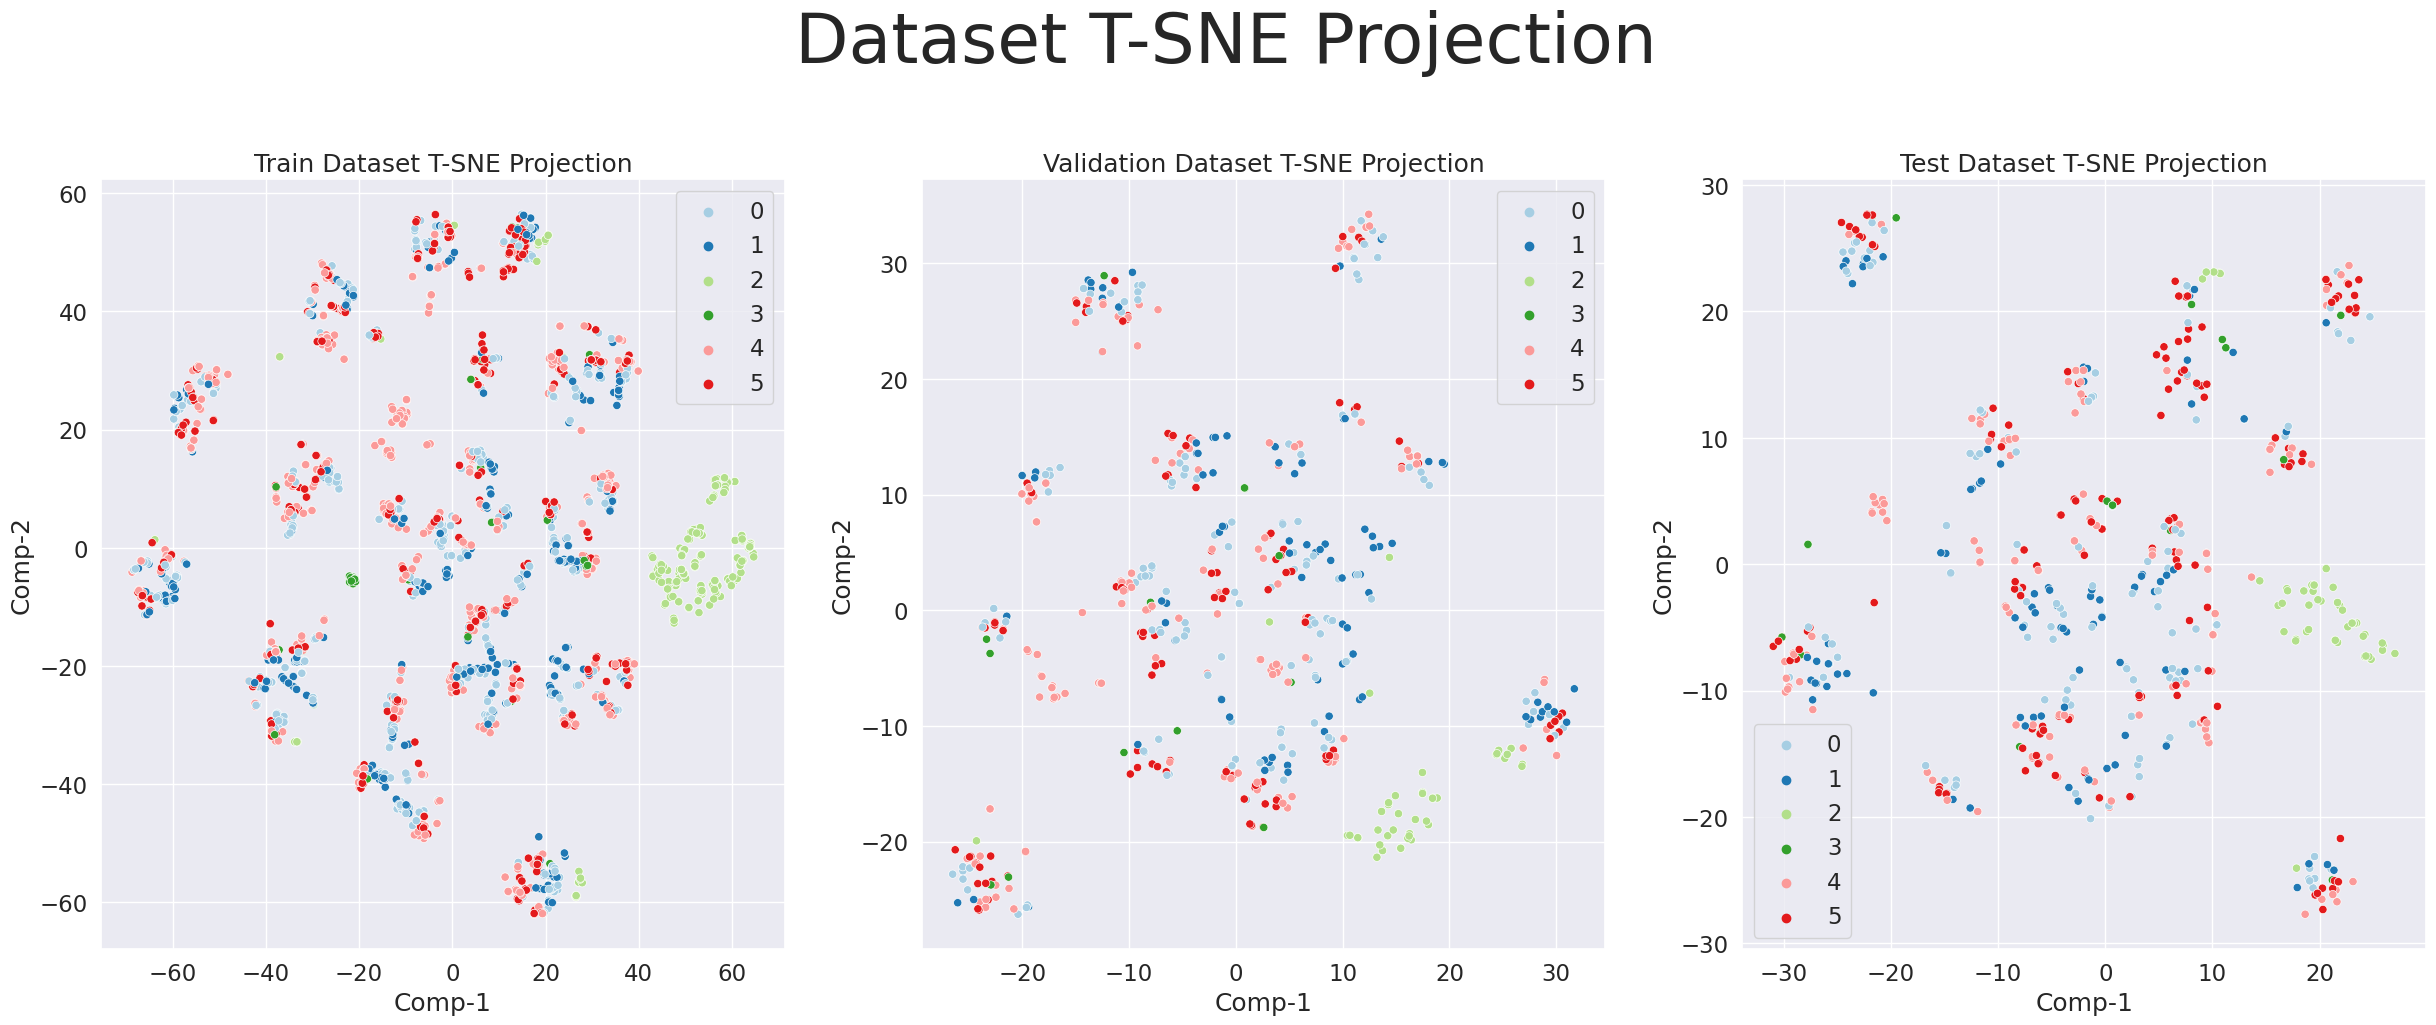

In [ ]:
x_size , y_size =1,3
fig, axes = plt.subplots(1, 3,figsize=(30,10))

titles =["Train","Validation", "Test"]
c = [y_train_encoded, y_val_encoded, y_test_encoded]
for i in range(3):
  ax = axes[i]
  sns.scatterplot(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1],hue=c[i],ax=ax,palette="Paired")
  # ax.scatter(x=t_sne_plots[i][:,0], y=t_sne_plots[i][:,1], c= c[i])
  ax.set_title(f"{titles[i]} Dataset T-SNE Projection")
  ax.set_xlabel('Comp-1')
  ax.set_ylabel('Comp-2')

plt.suptitle('Dataset T-SNE Projection',size=50,y=1.05)
plt.savefig("Dataset T-SNE Projection.png")
plt.show()

## Use ANOVA and Mutual Information to select the best feature with testing accuracy

### helper function to select the best features for anova and mutual information

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

n_features = X_train_scaled.shape[1]
def feature_selection(function,X_train,y_train,X_val,y_val,X_test,y_test):
    test_accuracies =[]
    val_accuracies=[]
    models=[]
    for i in range(1,n_features+1):
        k_best = SelectKBest(function, k=i)
        X_train_best=tf.convert_to_tensor(k_best.fit_transform(X_train,y_train))
        X_val_best=tf.convert_to_tensor(k_best.transform(X_val))
        X_test_best=tf.convert_to_tensor(k_best.transform(X_test))
        feature_selection_accuracies_dict, feature_selection_models_dict,feature_selection_models_train_acc,feature_selection_models_test_acc,feature_selection_models_valid_acc = Build_experment(X_train_best, y_train_encoded, X_val_best, y_val_encoded, X_test_best, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=512, n_of_models=5)
        models.append(feature_selection_models_dict)
        test_accuracies.append(feature_selection_accuracies_dict['AVG_test_acc'])
        val_accuracies.append(feature_selection_accuracies_dict['AVG_valid_acc'])
    return test_accuracies,val_accuracies,models

## Anova

In [ ]:
anova_test_accuracies,anova_val_accuracies,anova_models=feature_selection(f_classif, X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, X_test_scaled, y_test_encoded)

18/18 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.7184


<Axes: title={'center': 'Anova test accuracies vs number of features'}, xlabel='Number of features', ylabel='Accuracies'>

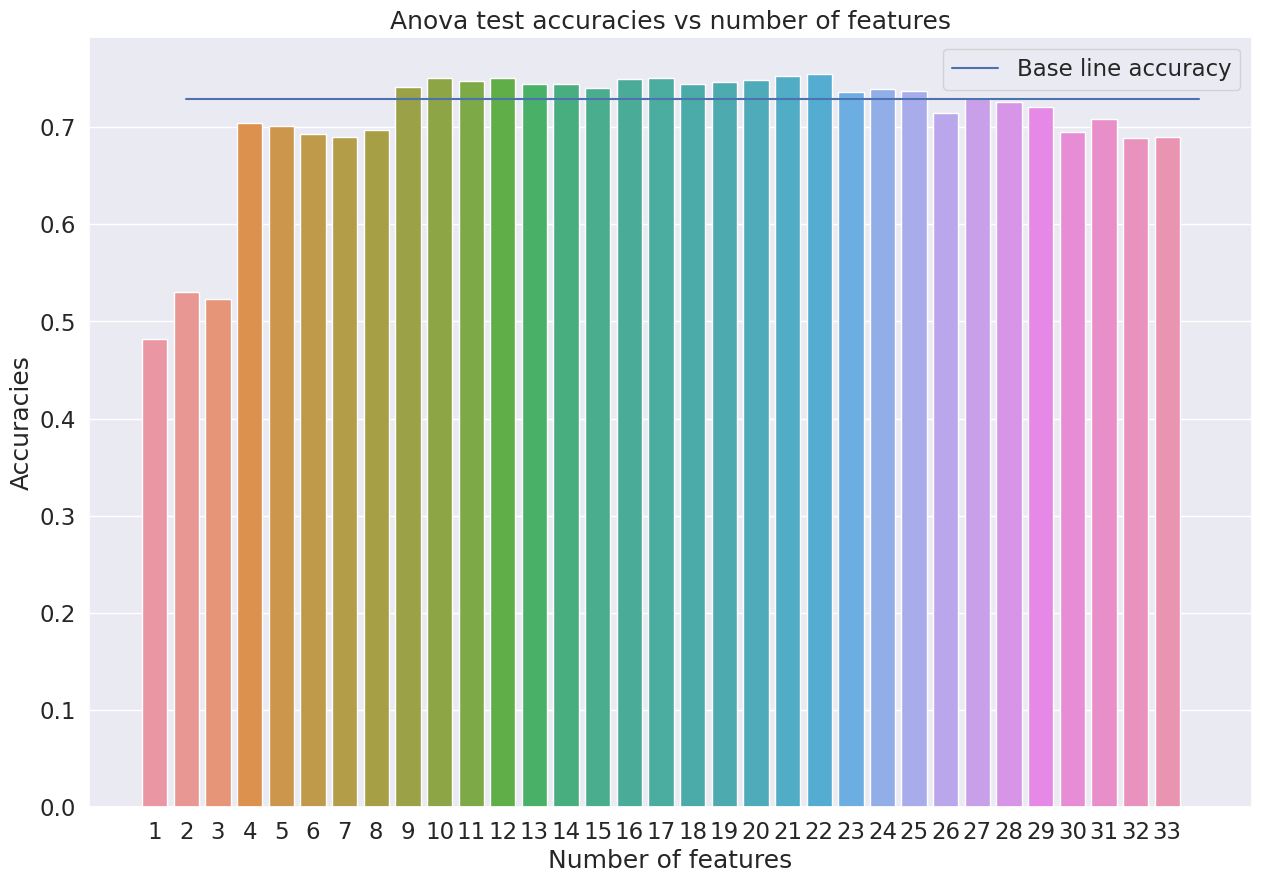

In [ ]:
sns.barplot(x=list(range(1,n_features+1)),y=anova_test_accuracies).set(title='Anova test accuracies vs number of features',xlabel='Number of features',ylabel='Accuracies')
sns.lineplot(x=list(range(1,n_features+1)),y= [base_line_accuracies_dict["AVG_test_acc"]]*n_features,label='Base line accuracy')


## Mutual information

In [ ]:
mutual_information_test_accuracies,mutual_information_val_accuracies,mutual_information_models=feature_selection(mutual_info_classif, X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, X_test_scaled, y_test_encoded)

18/18 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.7308


<Axes: title={'center': 'Mutual information test accuracies vs number of features'}, xlabel='Number of features', ylabel='Accuracies'>

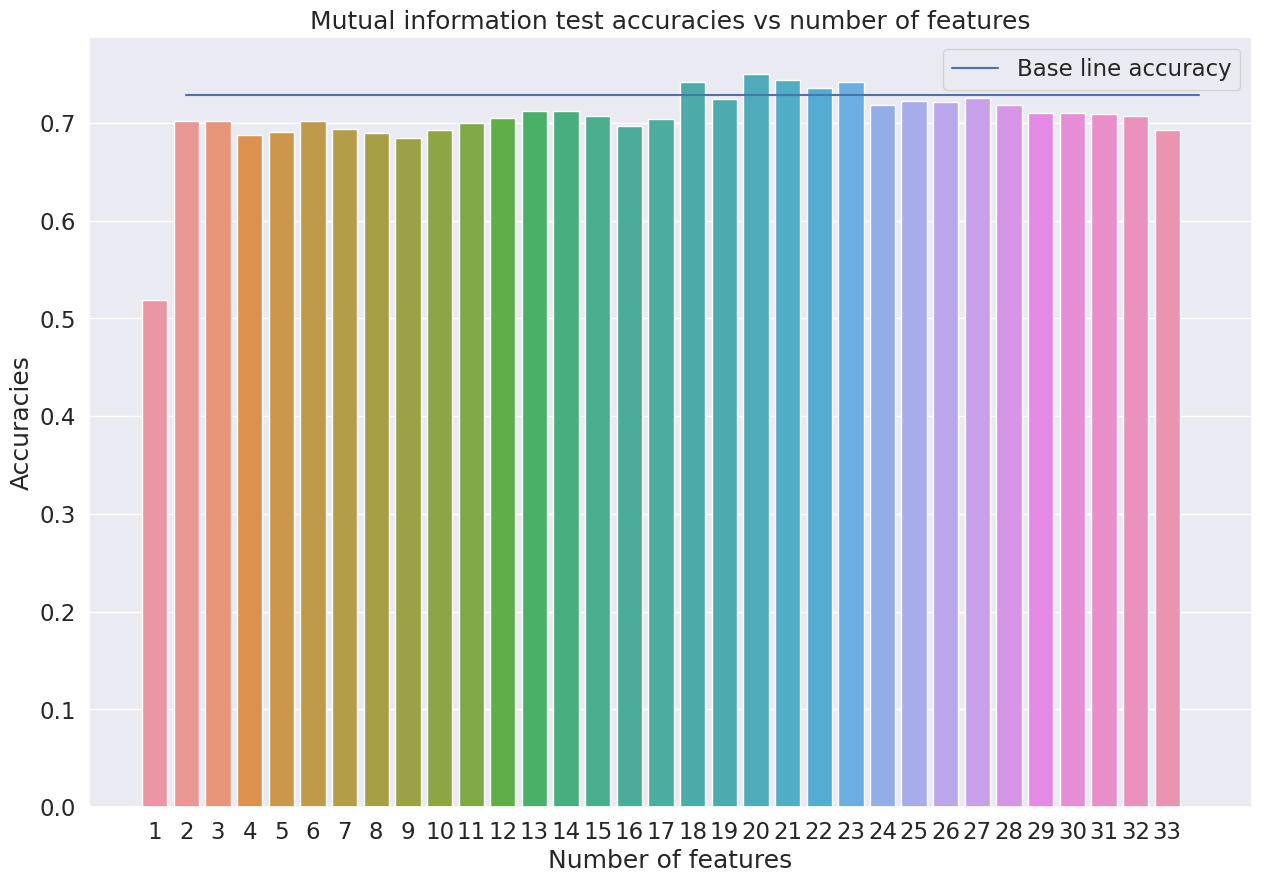

In [ ]:
sns.barplot(x=list(range(1,n_features+1)),y=mutual_information_test_accuracies).set(title='Mutual information test accuracies vs number of features',xlabel='Number of features',ylabel='Accuracies')
sns.lineplot(x=list(range(1,n_features+1)),y= [base_line_accuracies_dict["AVG_test_acc"]]*n_features,label='Base line accuracy')


## Choose the method that achieves the best test accuracy results (either the ANOVA or mutual information),

In [ ]:
max(anova_test_accuracies),max(mutual_information_test_accuracies)

(0.7547237038612366, 0.7500891327857971)

<Axes: >

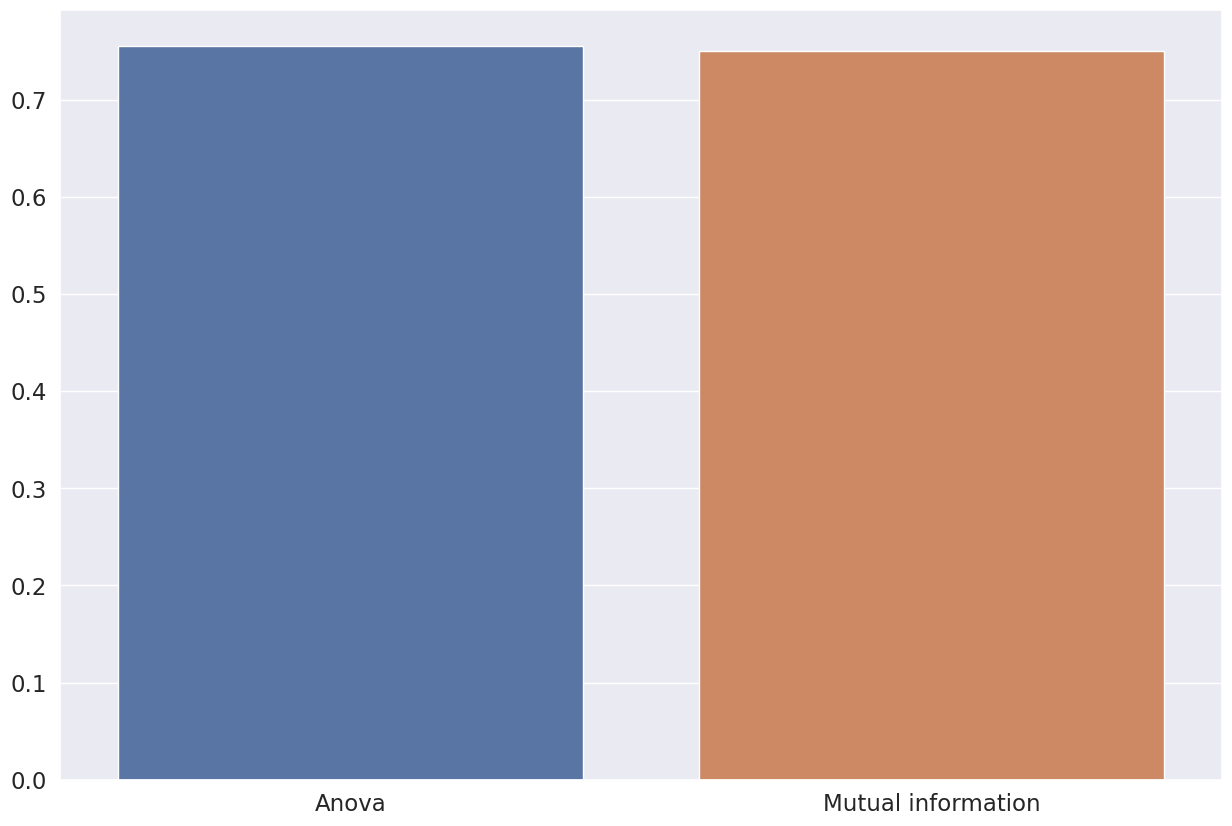

In [ ]:
sns.barplot(x=["Anova","Mutual information"],y=[max(anova_test_accuracies),max(mutual_information_test_accuracies)])

### Anova has the higher accuracy

## Get the highest anova model

In [ ]:
n_features_arr=list(range(1,n_features+1))
best_n_feature_anova=n_features_arr[np.array(anova_test_accuracies).argmax()]
best_n_feature_anova

22

## TSNE for the Data with best_n_features using anova

In [ ]:
k_best = SelectKBest(f_classif, k=best_n_feature_anova)
X_train_best_anova=k_best.fit_transform(X_train_scaled, y_train_encoded)
X_val_best_anova=k_best.transform(X_val_scaled)
X_test_best_anova=k_best.transform(X_test_scaled)


In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(rc={'figure.figsize':(15,15)})
sns.set_context("notebook", font_scale=2)
tsne = TSNE(n_components=2, random_state=0,init='pca',learning_rate='auto')
X_train_best_anova_tsne= tsne.fit_transform(X_train_best_anova)
X_val_best_anova_tsne= tsne.fit_transform(X_val_best_anova)
X_test_best_anova_tsne= tsne.fit_transform(X_test_best_anova)
X_train_best_anova_tsne

array([[ 22.312649  ,   8.398741  ],
       [ 22.64231   ,  10.057068  ],
       [ 40.623363  ,  -0.27427477],
       ...,
       [  7.145992  , -14.949812  ],
       [ 40.35019   ,  39.051098  ],
       [-22.776285  , -39.909164  ]], dtype=float32)

[Text(0.5, 1.0, 'Test Data after using anova with number of features = 11'),
 Text(0.5, 0, 'Feature1'),
 Text(0, 0.5, 'Feature2')]

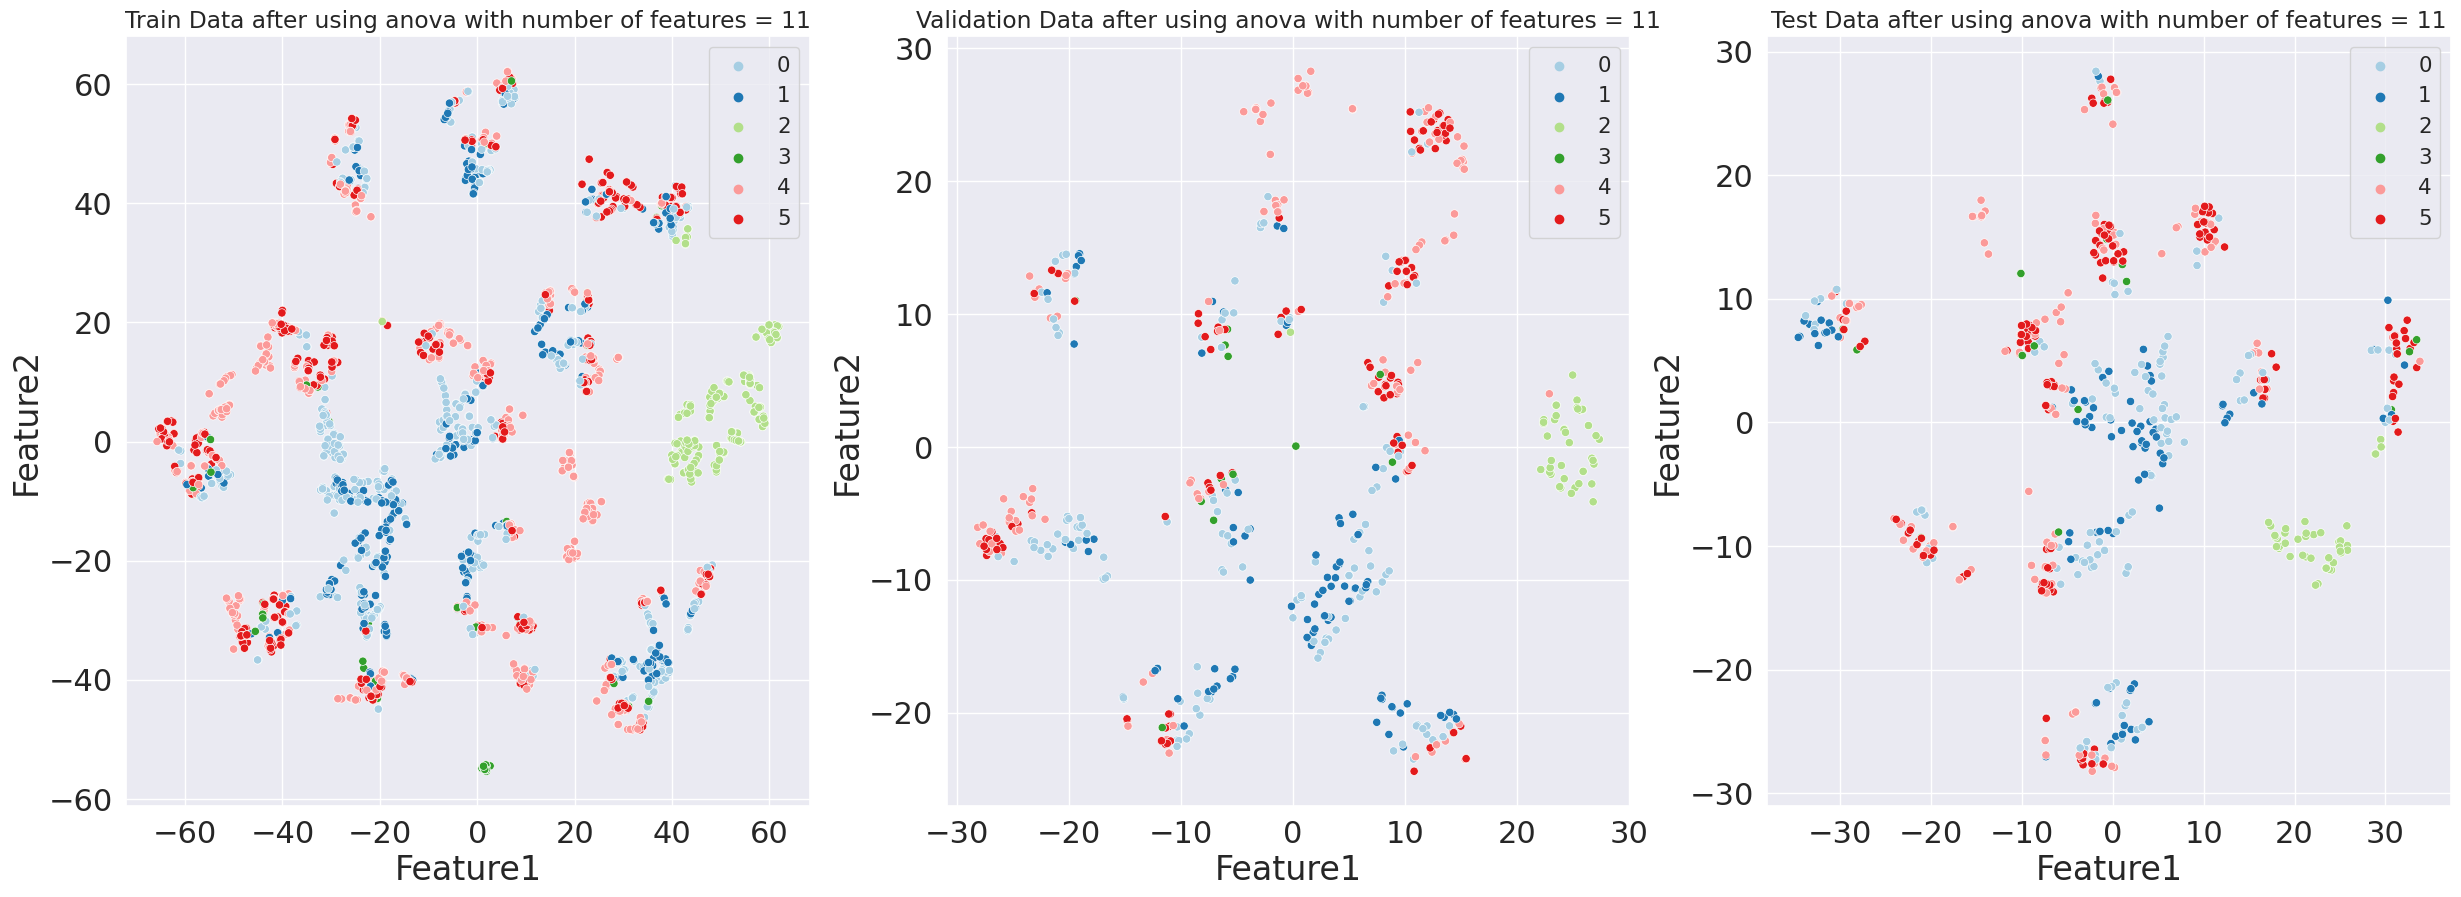

In [ ]:
figs,axis=plt.subplots(1,3,figsize=(30,10))
# sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font_scale = 1.4)
sns.scatterplot(x=X_train_best_anova_tsne[:,0], y=X_train_best_anova_tsne[:,1], hue=y_train_encoded, ax=axis[0], palette="Paired").set(title='Train Data after using anova with number of features = 11', xlabel='Feature1', ylabel='Feature2')
sns.scatterplot(x=X_val_best_anova_tsne[:,0],y=X_val_best_anova_tsne[:,1],hue=y_val_encoded,ax=axis[1],palette="Paired").set(title='Validation Data after using anova with number of features = 11',xlabel='Feature1',ylabel='Feature2')
sns.scatterplot(x=X_test_best_anova_tsne[:,0],y=X_test_best_anova_tsne[:,1],hue=y_test_encoded,ax=axis[2],palette="Paired").set(title='Test Data after using anova with number of features = 11',xlabel='Feature1',ylabel='Feature2')

## Then we updated the dataset, to be used in the next steps, based on the technique that provides us with highest validation accuracy

In [ ]:
max(anova_val_accuracies), max(PCA_val_accuracies)

(0.7614973306655883, 0.7415329694747925)

Text(0, 0.5, 'Validation Accuracies')

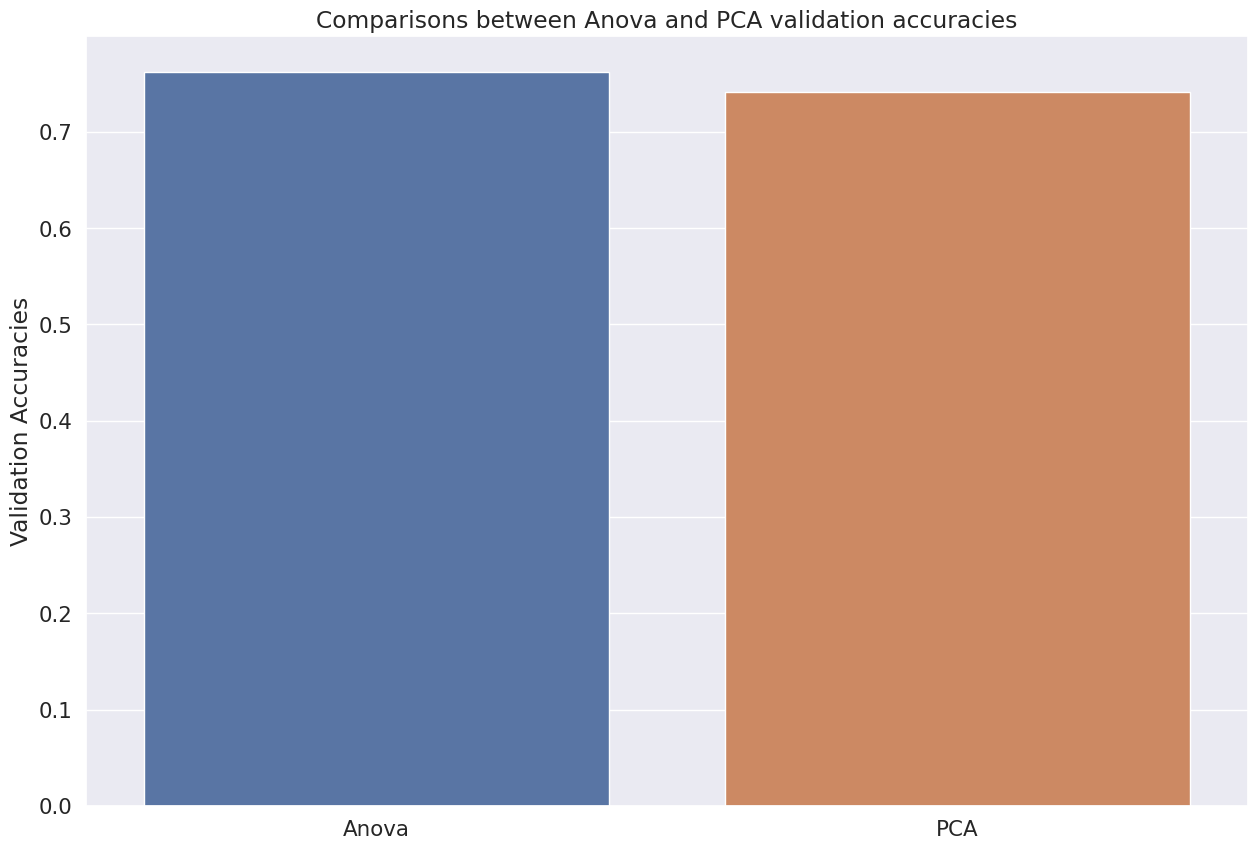

In [ ]:
sns.barplot(x=["Anova", "PCA"], y=[max(anova_val_accuracies), max(PCA_val_accuracies)])
plt.title('Comparisons between Anova and PCA validation accuracies')
plt.ylabel('Validation Accuracies')

In [ ]:
k_best = SelectKBest(f_classif, k=best_n_feature_anova)
X_train_best_anova_val=k_best.fit_transform(X_train_scaled, y_train_encoded)
X_val_best_anova_val=k_best.transform(X_val_scaled)
X_test_best_anova_val=k_best.transform(X_test_scaled)

## The average confusion matrix for the highest validation accuracy

18/18 [==============================] - 0s 2ms/step


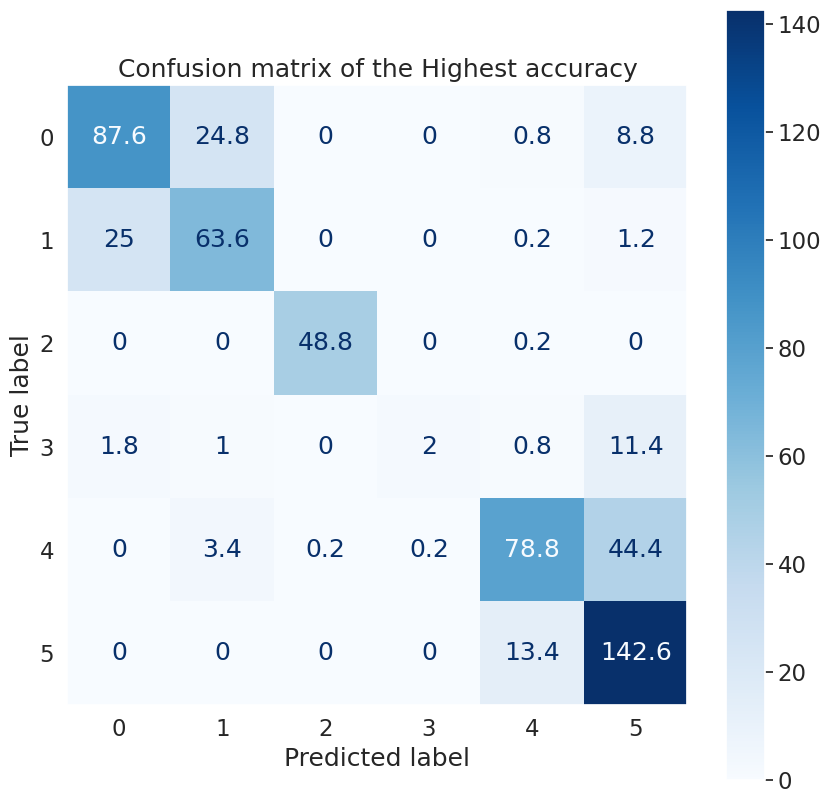

In [ ]:
idx_anova=np.array(anova_test_accuracies).argmax()
highest_val_anova_models=anova_models[idx_anova]

# Calculate the Average confusion test matrix
cm1 = np.zeros(shape=(6, 6))
for model in highest_val_anova_models['models']:
    pred = model.predict(X_test_best_anova_val).argmax(axis=1)
    cm1 += confusion_matrix(y_test_encoded, pred)
cm_avg_1 = cm1 / len(base_line_models_dict['models'])
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale=1.5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_avg_1, )
disp = disp.plot(cmap=plt.cm.Blues, values_format='g', )

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()

# Vary the MLP parameters

## 1) Batch size

In [ ]:
batches = [32,64,128]
batch_accuracies_dict_list = []
for batch_size in batches:
    batch_accuracies_dict, batch_models_dict,batch_models_train_acc,batch_models_test_acc,batch_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optimizer, n_of_hidden_layers=1, n_neurons=10, activation='relu', epochs=500, batch_size=batch_size, n_of_models=5)
    batch_accuracies_dict_list.append(batch_accuracies_dict)

18/18 [==============================] - 0s 3ms/step - loss: 0.5883 - accuracy: 0.7344


### Batch_size 32

In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[0])).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.744177,0.777396,0.764108,0.757576,0.773619,0.766845,0.754011,0.771836,0.760428


### Batch_size 64

In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[1])).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.760596,0.770141,0.767392,0.750446,0.766488,0.759358,0.73262,0.782531,0.759002


### Batch_size=128

In [ ]:
pd.DataFrame(pd.Series(batch_accuracies_dict_list[2])).transpose()

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.749905,0.775487,0.764414,0.754011,0.771836,0.760784,0.734403,0.778966,0.759358


### Highest average test accuracy

In [ ]:
idx=np.array([batch_accuracies_dict_list[0]['AVG_valid_acc'],batch_accuracies_dict_list[1]['AVG_valid_acc'],batch_accuracies_dict_list[2]['AVG_valid_acc']]).argmax()
best_batch_size=batches[idx]
best_batch_size

32

## 2) Hidden layers vs. neurons/layer

In [ ]:
n_hidden_layers = [1,2,4,8]
n_neurons = [10,20,30,40]
hidden_accuracies_dict_list = {1:[],2:[],4:[],8:[]}

for n_hidden in n_hidden_layers:
    for n_neuron in n_neurons:
        hidden_accuracies_dict, hidden_models_dict,hidden_models_train_acc,hidden_models_test_acc,hidden_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optimizer, n_of_hidden_layers=n_hidden, n_neurons=n_neuron, activation='relu', epochs=500, batch_size=best_batch_size, n_of_models=5)
        hidden_accuracies_dict_list[n_hidden].append(hidden_accuracies_dict)

18/18 [==============================] - 0s 4ms/step - loss: 0.5312 - accuracy: 0.7754


### Using 1 hidden layers

In [ ]:
hidden_layers_1=pd.DataFrame(hidden_accuracies_dict_list[1])
hidden_layers_1

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.749523,0.777778,0.763879,0.745098,0.771836,0.759002,0.746881,0.771836,0.760784
1,0.773578,0.787705,0.779992,0.734403,0.768271,0.759002,0.766488,0.777184,0.769697
2,0.780832,0.791523,0.784498,0.748663,0.773619,0.763280,0.757576,0.777184,0.767201
3,0.788469,0.796869,0.793433,0.739750,0.778966,0.755793,0.770053,0.787879,0.778966


### Using 2 hidden layers

In [ ]:
hidden_layers_2=pd.DataFrame(hidden_accuracies_dict_list[2])
hidden_layers_2

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.757159,0.779687,0.770141,0.752228,0.773619,0.763636,0.752228,0.770053,0.759715
1,0.779687,0.798778,0.785796,0.752228,0.782531,0.770410,0.770053,0.795009,0.777897
2,0.786942,0.802596,0.792364,0.745098,0.773619,0.759002,0.771836,0.784314,0.777540
3,0.791523,0.802215,0.798167,0.764706,0.771836,0.767914,0.773619,0.789661,0.779323


### Using 4 hidden layers

In [ ]:
hidden_layers_4=pd.DataFrame(hidden_accuracies_dict_list[4])
hidden_layers_4

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.740741,0.774341,0.761130,0.748663,0.768271,0.759358,0.748663,0.771836,0.760071
1,0.784269,0.791905,0.789538,0.768271,0.778966,0.774688,0.768271,0.795009,0.784314
2,0.797633,0.828942,0.806033,0.757576,0.796791,0.778610,0.786096,0.795009,0.790374
3,0.797251,0.818633,0.808095,0.770053,0.798574,0.781818,0.777184,0.793226,0.785740


### Using 8 hidden layers

In [ ]:
hidden_layers_8=pd.DataFrame(hidden_accuracies_dict_list[8])
hidden_layers_8

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
0,0.705995,0.750668,0.734632,0.718360,0.759358,0.736185,0.700535,0.759358,0.734759
1,0.792669,0.815578,0.801833,0.773619,0.795009,0.785383,0.778966,0.796791,0.787879
2,0.776632,0.820924,0.793891,0.757576,0.780749,0.771836,0.771836,0.805704,0.785383
3,0.778160,0.814815,0.801298,0.775401,0.795009,0.788948,0.775401,0.800357,0.789305


### Plot the number of neurons vs the avg test accuracy

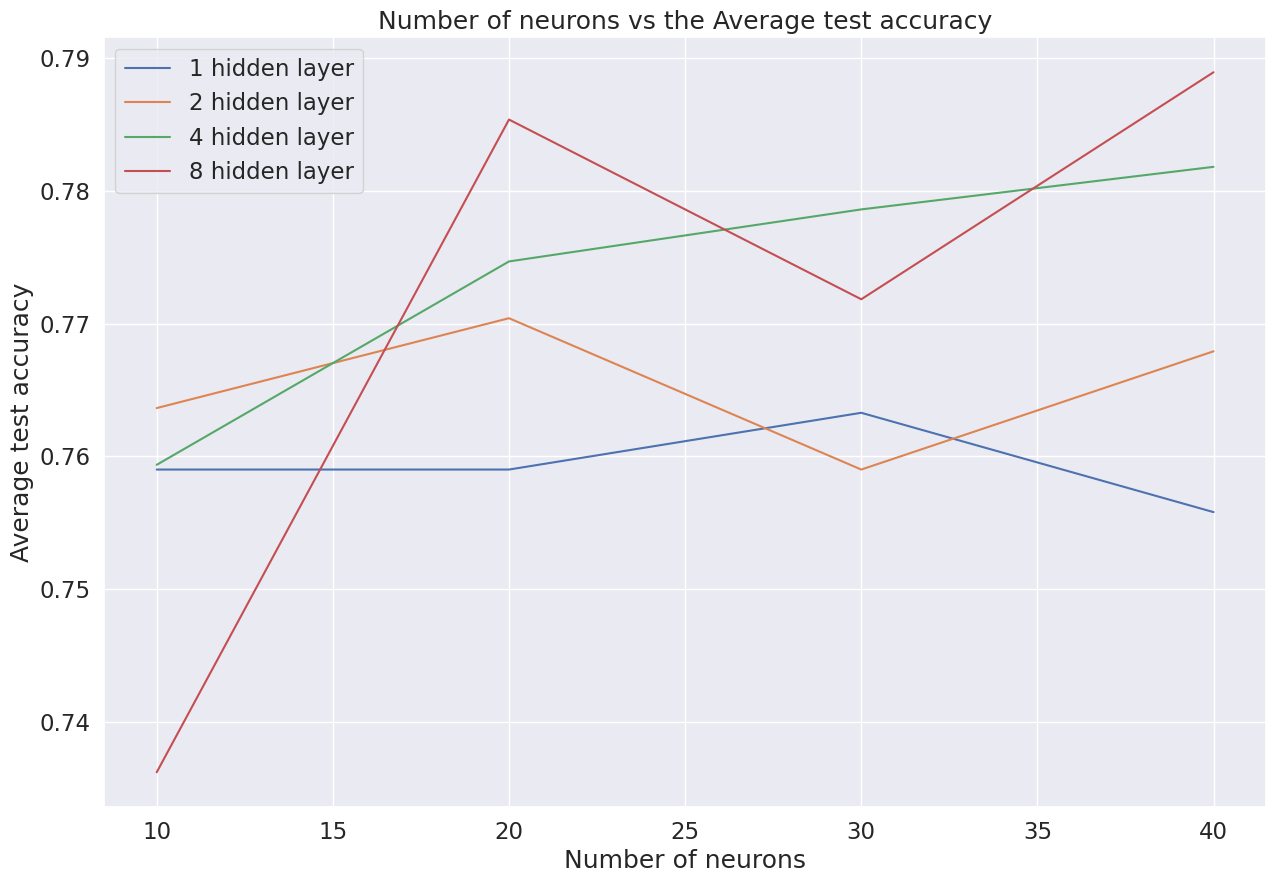

In [ ]:
sns.lineplot(x=n_neurons,y=hidden_layers_1['AVG_test_acc'],label='1 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_2['AVG_test_acc'],label='2 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_4['AVG_test_acc'],label='4 hidden layer')
sns.lineplot(x=n_neurons,y=hidden_layers_8['AVG_test_acc'],label='8 hidden layer')
plt.title('Number of neurons vs the Average test accuracy')
plt.xlabel('Number of neurons')
plt.ylabel('Average test accuracy')
plt.show()

### Get the best number of neurons and hidden layers

In [ ]:
maxi=-99999
best_neurons=-9999
best_hidden=-9999
hidden_layers_list=[hidden_layers_1,hidden_layers_2,hidden_layers_4,hidden_layers_8]
for i,hidden_layer in enumerate(hidden_layers_list) :
    if max(hidden_layer['AVG_valid_acc']) >maxi :
        maxi=max(hidden_layer['AVG_valid_acc'])
        idx=np.array(hidden_layer['AVG_valid_acc']).argmax()
        best_neurons=n_neurons[idx]
        best_hidden=n_hidden_layers[i]
best_neurons,best_hidden

(30, 4)

## 3) Learning rate and different optimizers

In [ ]:
optim_accuracies_dict = {
                    'AdamW_lr_0.1':[],'AdamW_lr_0.01':[],'AdamW_lr_0.001':[],
                   'SGD_m_0.1_lr_0.1':[],'SGD_m_0.1_lr_0.01':[],'SGD_m_0.1_lr_0.001':[],
                   'SGD_m_0.5_lr_0.1':[],'SGD_m_0.5_lr_0.01':[],'SGD_m_0.5_lr_0.001':[],
                   'SGD_m_0.9_lr_0.1':[],'SGD_m_0.9_lr_0.01':[],'SGD_m_0.9_lr_0.001':[],
                   'RMSprop_lr_0.1':[],'RMSprop_lr_0.01':[],'RMSprop_lr_0.001':[],
}
optim_accuracies_dict['AdamW_lr_0.1'].append('sss')
optim_accuracies_dict

{'AdamW_lr_0.1': ['sss'],
 'AdamW_lr_0.01': [],
 'AdamW_lr_0.001': [],
 'SGD_m_0.1_lr_0.1': [],
 'SGD_m_0.1_lr_0.01': [],
 'SGD_m_0.1_lr_0.001': [],
 'SGD_m_0.5_lr_0.1': [],
 'SGD_m_0.5_lr_0.01': [],
 'SGD_m_0.5_lr_0.001': [],
 'SGD_m_0.9_lr_0.1': [],
 'SGD_m_0.9_lr_0.01': [],
 'SGD_m_0.9_lr_0.001': [],
 'RMSprop_lr_0.1': [],
 'RMSprop_lr_0.01': [],
 'RMSprop_lr_0.001': []}

In [ ]:
from tensorflow.keras.optimizers.legacy import SGD,RMSprop

tf.keras.optimizers.legacy.SGD(learning_rate=0.1)
optimizers=[AdamW(learning_rate=0.1,weight_decay=0.0001),AdamW(learning_rate=0.01,weight_decay=0.0001),AdamW(learning_rate=0.001,weight_decay=0.0001),
            SGD(learning_rate=0.1,momentum=0.1),SGD(learning_rate=0.01,momentum=0.1),SGD(learning_rate=0.001,momentum=0.1),
            SGD(learning_rate=0.1,momentum=0.5),SGD(learning_rate=0.01,momentum=0.5),SGD(learning_rate=0.001,momentum=0.5),
            SGD(learning_rate=0.1,momentum=0.9),SGD(learning_rate=0.01,momentum=0.9),SGD(learning_rate=0.001,momentum=0.9),
            RMSprop(learning_rate=0.1),RMSprop(learning_rate=0.01),RMSprop(learning_rate=0.001)
            ]
optim_accuracies = {
                    'AdamW_lr_0.1':[],'AdamW_lr_0.01':[],'AdamW_lr_0.001':[],
                   'SGD_m_0.1_lr_0.1':[],'SGD_m_0.1_lr_0.01':[],'SGD_m_0.1_lr_0.001':[],
                   'SGD_m_0.5_lr_0.1':[],'SGD_m_0.5_lr_0.01':[],'SGD_m_0.5_lr_0.001':[],
                   'SGD_m_0.9_lr_0.1':[],'SGD_m_0.9_lr_0.01':[],'SGD_m_0.9_lr_0.001':[],
                   'RMSprop_lr_0.1':[],'RMSprop_lr_0.01':[],'RMSprop_lr_0.001':[],
}
experiments_names=['AdamW_lr_0.1','AdamW_lr_0.01','AdamW_lr_0.001',
                   'SGD_m_0.1_lr_0.1','SGD_m_0.1_lr_0.01','SGD_m_0.1_lr_0.001',
                   'SGD_m_0.5_lr_0.1','SGD_m_0.5_lr_0.01','SGD_m_0.5_lr_0.001',
                   'SGD_m_0.9_lr_0.1','SGD_m_0.9_lr_0.01','SGD_m_0.9_lr_0.001',
                   'RMSprop_lr_0.1','RMSprop_lr_0.01','RMSprop_lr_0.001',
                   ]
best_optim=0
best_optim_name=''
maxi_optim=-9999
for i,optim in enumerate(optimizers):
    optim_accuracies_dict, optim_models_dict,optim_models_train_acc,optim_models_test_acc,optim_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, optim, n_of_hidden_layers=best_hidden, n_neurons=best_neurons, activation='relu', epochs=500, batch_size=best_batch_size, n_of_models=5)
    if optim_accuracies_dict['AVG_valid_acc']>maxi_optim:
        maxi_optim=optim_accuracies_dict['AVG_valid_acc']
        best_optim_name=experiments_names[i]
        best_optim=optimizers[i]
    optim_accuracies[experiments_names[i]].append(optim_accuracies_dict)

18/18 [==============================] - 0s 2ms/step - loss: 0.5517 - accuracy: 0.7807


#### Optimizer results

In [ ]:
dfs=[]
for i in optim_accuracies.keys():
    dfs.append(pd.DataFrame(pd.Series(optim_accuracies[i][0])).transpose())
optimizers_results=pd.concat(dfs)
optimizers_results.index=experiments_names
optimizers_results

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
AdamW_lr_0.1,0.214204,0.585338,0.307827,0.217469,0.604278,0.299822,0.251337,0.598930,0.324777
AdamW_lr_0.01,0.777778,0.801833,0.787400,0.773619,0.798574,0.791087,0.782531,0.807487,0.795009
AdamW_lr_0.001,0.786178,0.813669,0.802978,0.766488,0.787879,0.778610,0.775401,0.793226,0.784670
SGD_m_0.1_lr_0.1,0.782360,0.800687,0.790683,0.755793,0.782531,0.770766,0.777184,0.787879,0.782888
SGD_m_0.1_lr_0.01,0.759832,0.779687,0.766705,0.741533,0.764706,0.750089,0.746881,0.777184,0.763636
SGD_m_0.1_lr_0.001,0.748377,0.767087,0.759068,0.739750,0.768271,0.753654,0.741533,0.762923,0.752228
SGD_m_0.5_lr_0.1,0.772814,0.796487,0.783734,0.757576,0.793226,0.776114,0.773619,0.793226,0.783601
SGD_m_0.5_lr_0.01,0.771669,0.788469,0.778847,0.759358,0.766488,0.762567,0.755793,0.795009,0.773619
SGD_m_0.5_lr_0.001,0.748759,0.772050,0.759679,0.736185,0.761141,0.747950,0.745098,0.787879,0.760428
SGD_m_0.9_lr_0.1,0.678121,0.721649,0.704696,0.682709,0.737968,0.714438,0.675579,0.736185,0.718360


In [ ]:
optim_accuracies

{'AdamW_lr_0.1': [{'Min_train_acc': 0.21420389413833618,
   'Max_train_acc': 0.5853379368782043,
   'AVG_train_acc': 0.30782741904258726,
   'Min_test_acc': 0.21746881306171417,
   'Max_test_acc': 0.6042780876159668,
   'AVG_test_acc': 0.2998217523097992,
   'Min_valid_acc': 0.2513369023799896,
   'Max_valid_acc': 0.5989304780960083,
   'AVG_valid_acc': 0.3247771918773651}],
 'AdamW_lr_0.01': [{'Min_train_acc': 0.7777777910232544,
   'Max_train_acc': 0.8018327355384827,
   'AVG_train_acc': 0.7873997688293457,
   'Min_test_acc': 0.7736185193061829,
   'Max_test_acc': 0.7985739707946777,
   'AVG_test_acc': 0.7910873293876648,
   'Min_valid_acc': 0.782531201839447,
   'Max_valid_acc': 0.8074866533279419,
   'AVG_valid_acc': 0.79500892162323}],
 'AdamW_lr_0.001': [{'Min_train_acc': 0.786177933216095,
   'Max_train_acc': 0.8136693239212036,
   'AVG_train_acc': 0.802978229522705,
   'Min_test_acc': 0.7664884328842163,
   'Max_test_acc': 0.7878788113594055,
   'AVG_test_acc': 0.77860963344573

### Get the best optimizer

In [ ]:
optim_accuracies[best_optim_name]

[{'Min_train_acc': 0.7777777910232544,
  'Max_train_acc': 0.8018327355384827,
  'AVG_train_acc': 0.7873997688293457,
  'Min_test_acc': 0.7736185193061829,
  'Max_test_acc': 0.7985739707946777,
  'AVG_test_acc': 0.7910873293876648,
  'Min_valid_acc': 0.782531201839447,
  'Max_valid_acc': 0.8074866533279419,
  'AVG_valid_acc': 0.79500892162323}]

In [ ]:
best_optim_name

'AdamW_lr_0.01'

## 4) Activation functions

In [ ]:
activations=['relu','leaky_relu','sigmoid','tanh']
activation_accuracies_dict_list = {}

maxi_activation=-9999
best_activation=''
best_model=0
for activation in activations :
    activation_accuracies_dict, activation_models_dict,activation_models_train_acc,activation_models_test_acc,activation_models_valid_acc = Build_experment(X_train_best_anova_val, y_train_encoded, X_val_best_anova_val, y_val_encoded, X_test_best_anova_val, y_test_encoded, best_optim, n_of_hidden_layers=best_hidden, n_neurons=best_neurons, activation=activation, epochs=500, batch_size=best_batch_size, n_of_models=5)
    if activation_accuracies_dict['AVG_test_acc'] >maxi_activation :
        maxi_activation=activation_accuracies_dict['AVG_test_acc']
        best_activation=activation
        best_model=activation_models_dict['models'][np.array(activation_models_test_acc).argmax()]
    activation_accuracies_dict_list[activation]=activation_accuracies_dict

18/18 [==============================] - 0s 4ms/step - loss: 0.5942 - accuracy: 0.7504


In [ ]:
dfs=[]
for i in activation_accuracies_dict_list.keys():
    dfs.append(pd.DataFrame(pd.Series(activation_accuracies_dict_list[i])).transpose())
activation_results=pd.concat(dfs)
activation_results.index=activations
activation_results

,Min_train_acc,Max_train_acc,AVG_train_acc,Min_test_acc,Max_test_acc,AVG_test_acc,Min_valid_acc,Max_valid_acc,AVG_valid_acc
relu,0.772814,0.798778,0.787323,0.770053,0.800357,0.788235,0.773619,0.814617,0.793583
leaky_relu,0.743414,0.810997,0.782131,0.770053,0.816399,0.788235,0.754011,0.805704,0.786453
sigmoid,0.770905,0.801833,0.791065,0.784314,0.818182,0.800713,0.787879,0.812834,0.797148
tanh,0.721649,0.785796,0.755861,0.725490,0.784314,0.757932,0.736185,0.791444,0.763280


In [ ]:
activation_accuracies_dict_list

{'relu': {'Min_train_acc': 0.7728140354156494,
  'Max_train_acc': 0.7987781763076782,
  'AVG_train_acc': 0.7873234152793884,
  'Min_test_acc': 0.7700534462928772,
  'Max_test_acc': 0.8003565073013306,
  'AVG_test_acc': 0.7882352948188782,
  'Min_valid_acc': 0.7736185193061829,
  'Max_valid_acc': 0.8146167397499084,
  'AVG_valid_acc': 0.7935828804969788},
 'leaky_relu': {'Min_train_acc': 0.743413507938385,
  'Max_train_acc': 0.8109965920448303,
  'AVG_train_acc': 0.7821305871009827,
  'Min_test_acc': 0.7700534462928772,
  'Max_test_acc': 0.8163992762565613,
  'AVG_test_acc': 0.7882352828979492,
  'Min_valid_acc': 0.7540106773376465,
  'Max_valid_acc': 0.8057041168212891,
  'AVG_valid_acc': 0.7864527583122254},
 'sigmoid': {'Min_train_acc': 0.7709048986434937,
  'Max_train_acc': 0.8018327355384827,
  'AVG_train_acc': 0.7910652756690979,
  'Min_test_acc': 0.7843137383460999,
  'Max_test_acc': 0.8181818127632141,
  'AVG_test_acc': 0.8007130146026611,
  'Min_valid_acc': 0.7878788113594055,


## Provide the confusion matrix for the highest average accuracy

18/18 [==============================] - 0s 3ms/step


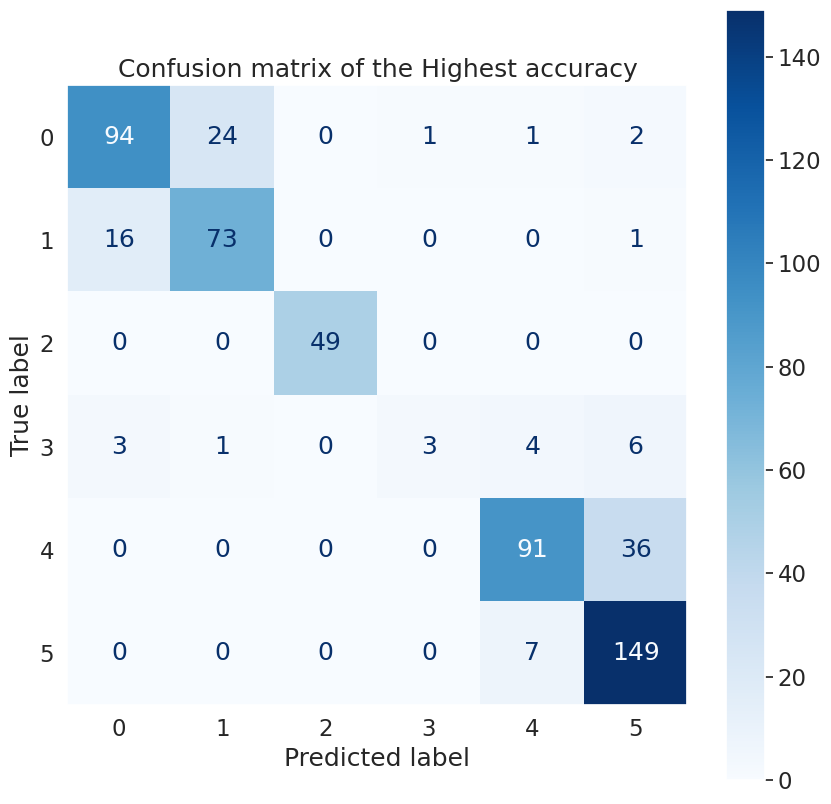

In [ ]:
# Set your custom color palette
colors = ["#FF0B04", "#4374B3"]
sns.set_palette(sns.color_palette(colors))
sns.set(font_scale = 1.5)

pred = best_model.predict(X_test_best_anova_val).argmax(axis=1)
cm = confusion_matrix(y_test_encoded, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g',)

fig = disp.ax_.get_figure()
fig.set_figwidth(10)
fig.set_figheight(10)

plt.title('Confusion matrix of the Highest accuracy')
plt.grid(False)
plt.show()